In [2]:
# The code was removed by Watson Studio for sharing.

# Final battle Testbench

### Created By Frank Schliephacke 2019

In [3]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
#import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [4]:
# convert to ascii - if necessary
def TestConvertUTF2ASCII(fname1, fname2):
    with open(fname1, 'r', encoding="utf-8", errors="surrogateescape") as f:
        data = f.read()
    f.close()
    
    # make changes to the string 'data'
    with open(fname2 + '.new', 'w', encoding="ascii", errors="surrogateescape") as f:
        f.write(data)
    f.close()



In [5]:
# Test csv file reading

# Import the lib
#from project_lib import Project
#project = Project(sc,"<ProjectId>", "<ProjectToken>")

def TestSparkStorageCSV():
    # Get the url
    url = project.get_file_url("HemnetGeoLocations.csv")
    
    # Fetch the CSV file from the object storage using Spark
    from pyspark.sql import SparkSession
    spark = SparkSession.builder.getOrCreate()
    df_data_1 = spark.read\
      .format('org.apache.spark.sql.execution.datasources.csv.CSVFileFormat')\
      .option('header', 'true')\
      .load(url)
    df_data_1.show(5)



In [6]:
# Import the lib
#from project_lib import Project
#project = Project(sc,"<ProjectId>", "<ProjectToken>")


# Fetch the file
my_file = project.get_file("HemnetGeoLocationsASCII.csv")

# Read the CSV data file from the object storage into a pandas DataFrame
my_file.seek(0)
#import pandas as pd

#import chardet
#import pandas as pd

df1 = pd.read_csv(my_file, encoding='iso-8859-1')

# Try calling read_csv with encoding='latin1', encoding='iso-8859-1' or encoding='cp1252'
#df1=pd.read_csv(my_file, encoding='utf-8', nrows=10)
#df1=pd.read_csv(my_file, encoding='ascii')
df1.shape


(4034, 7)

In [7]:
df1.head()

,Lat,Long,Street,Dummy1,PriceSEK,PriceSQM,Dummy2
0,0.0,0.0,FYRVAKTARKROKEN 26: FYRVAKTARKROKEN 26:BLASUT:...,SLUTPRISSEK,3100000,65957.0,KR/M2
1,0.0,0.0,BALTZAR VON PLATENS GATA 7C:KUNGSHOLMEN-NORRMA...,SLUTPRISSEK,4400000,95652.0,KR/M2
2,0.0,0.0,SIBELIUSGANGEN 50:KISTA:STOCKHOLM:Sweden,SLUTPRISSEK,1995000,24660.0,KR/M2
3,0.0,0.0,HAMMARBY ALLÉ 105: HAMMARBY ALLÉ 105:HAMMARBYS...,SLUTPRISSEK,4010000,71607.0,KR/M2
4,0.0,0.0,MAMSELL ULLAS VAG 3:MALARHOJDEN:STOCKHOLM:Sweden,SLUTPRISSEK,3500000,59322.0,KR/M2


## Use geopy library to get the latitude and longitude values of New York City.¶

In [8]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [9]:
# get data from the internet
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


In [10]:
#with open('newyork_data.json') as json_data:
#    newyork_data = json.load(json_data)


In [11]:
# get data from assets on watson
#asset1="https://dataplatform.cloud.ibm.com/projects/323fea00-e8af-4a35-8b98-f50ff344dd57/data-assets/4164344a-18cc-44fd-ac34-e214d05a35bc"

#asset1=project.get_assets('data_asset')

# Fetch the file
#y_file2 = project.get_file("newyork_data.json")

# Read the CSV data file from the object storage into a pandas DataFrame
#my_file2.seek(0)

#import pandas as pd
#df2 = pd.read_json(my_file2)
#df2.shape

#with open(my_file2) as json_data:
#    newyork_data = json.load(json_data)

#newyork_data.shape

In [12]:
#asset1

In [13]:
#print(asset1[2]['name'],asset1[2]['asset_id'])
#my_asset_id=asset1[2]['asset_id']

In [14]:
with open('newyork_data.json') as json_data:
      newyork_data = json.load(json_data)

# get data from assets on watson
#with open(asset1) as json_data:
#      newyork_data = json.load(json_data)
        
# get data from assets on watson
#newyork_data = pd.read_json('newyork_data.json')
#newyork_data = pd.read_json(my_asset_id)

newyork_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

In [15]:
neighborhoods_data = newyork_data['features']
#neighborhoods_data[0]

In [16]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)
#neighborhoods

In [17]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [18]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


In [19]:
manhattan_data = neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688


##Create a map of New York with neighborhoods superimposed on top.

In [20]:
# check if folium library is imported allresdy
try:
    import folium # map rendering library
    #map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)
except Exception as e:
    print('ERROR: ', str(e))
    print('Installing folium now!')
    !conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
    print('Importing folium')
    import folium # map rendering library

ERROR:  No module named 'folium'
Installing folium now!
Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.6.16  |       hecc5488_0         145 KB  conda-forge
    certifi-2019.6.16          |           py36_1         149 KB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    openssl-1.1.1c             |       h516909a_0         2.1 MB  conda-forge
    altair-3.1.0               |           py36_0         724 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ------------------------------------------------------------
                                           To

In [21]:
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
#import folium # map rendering library


In [22]:
#

In [23]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    print(lat, lng, borough, neighborhood)
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

40.89470517661 -73.84720052054902 Bronx Wakefield
40.87429419303012 -73.82993910812398 Bronx Co-op City
40.887555677350775 -73.82780644716412 Bronx Eastchester
40.89543742690383 -73.90564259591682 Bronx Fieldston
40.890834493891305 -73.9125854610857 Bronx Riverdale
40.88168737120521 -73.90281798724604 Bronx Kingsbridge
40.87655077879964 -73.91065965862981 Manhattan Marble Hill
40.89827261213805 -73.86731496814176 Bronx Woodlawn
40.87722415599446 -73.8793907395681 Bronx Norwood
40.88103887819211 -73.85744642974207 Bronx Williamsbridge
40.866858107252696 -73.83579759808117 Bronx Baychester
40.85741349808865 -73.85475564017999 Bronx Pelham Parkway
40.84724670491813 -73.78648845267413 Bronx City Island
40.870185164975325 -73.8855121841913 Bronx Bedford Park
40.85572707719664 -73.9104159619131 Bronx University Heights
40.84789792606271 -73.91967159119565 Bronx Morris Heights
40.86099679638654 -73.89642655981623 Bronx Fordham
40.84269615786053 -73.88735617532338 Bronx East Tremont
40.8394750

# get some income tax per capita data for new york

In [24]:
ny_incometax_pc_url="https://en.wikipedia.org/wiki/List_of_New_York_locations_by_per_capita_income"
nydata=pd.read_html(ny_incometax_pc_url)
nydata

[    0                                                  1
 0 NaN  This article needs additional citations for ve...,
                                                    0
 0                This article is part of a series on
 1              Income in theUnited States of America
 2  Topics Household Personal Affluence Social cla...
 3  Lists by income States (by equality (Gini)) Co...
 4                               United States portal
 5                                                vte,
     Rank           County Per capitaincome Medianhouseholdincome  \
 0    1.0  New York County         $111,386               $64,971   
 1    2.0      Westchester          $73,159               $79,619   
 2    3.0           Nassau          $41,387               $93,613   
 3    4.0           Putnam          $37,915               $89,218   
 4    5.0          Suffolk          $35,755               $84,506   
 5    6.0         Rockland          $34,304               $82,534   
 6    7.0         Sar

In [25]:
capita_income=nydata[2]
capita_income.shape

(64, 7)

In [26]:
capita_income

,Rank,County,Per capitaincome,Medianhouseholdincome,Medianfamilyincome,Population,Number ofhouseholds
0,1.0,New York County,"$111,386","$64,971","$75,629",1585873,763846
1,2.0,Westchester,"$73,159","$79,619","$100,863",949113,347232
2,3.0,Nassau,"$41,387","$93,613","$107,934",1339532,448528
3,4.0,Putnam,"$37,915","$89,218","$101,576",99710,35041
4,5.0,Suffolk,"$35,755","$84,506","$96,220",1493350,499922
5,6.0,Rockland,"$34,304","$82,534","$96,836",311687,99242
6,7.0,Saratoga,"$32,186","$65,100","$81,251",219607,88296
7,8.0,Columbia,"$31,844","$55,546","$69,132",63096,25906
8,9.0,Dutchess,"$31,642","$69,838","$83,599",297488,107965
9,NaN,New York State,"$30,948","$55,603","$67,405",19378102,7317755


In [27]:
capita_income.dropna(inplace=True)
#capita_income['Rank','County','Per capitaincome','Medianhouseholdincome']
#capita_income['Medianhouseholdincome']
ny_income_county=capita_income['County']
ny_income_county

0     New York County
1         Westchester
2              Nassau
3              Putnam
4             Suffolk
5            Rockland
6            Saratoga
7            Columbia
8            Dutchess
10             Albany
11           Richmond
12           Hamilton
13             Ulster
14            Ontario
15             Orange
16             Warren
17        Schenectady
18         Rensselaer
20           Onondaga
21             Monroe
22               Erie
23           Tompkins
24             Queens
25          Schoharie
26              Tioga
27              Essex
28            Genesee
29             Broome
30            Madison
31            Niagara
32              Wayne
33              Kings
34             Greene
35             Oneida
36            Chemung
37           Sullivan
38            Steuben
39              Yates
40             Fulton
41             Cayuga
42           Delaware
43         Livingston
44             Otsego
45            Clinton
46         Montgomery
47        

In [28]:
address = 'New York County, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of {} are {}, {}.'.format(address, latitude, longitude))

The geograpical coordinate of New York County, NY are 40.7810178, -73.959299675.


In [29]:
address = 'Stuyvesant Heights, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of {} are {}, {}.'.format(address, latitude, longitude))

The geograpical coordinate of Stuyvesant Heights, NY are 42.387863, -73.775751.


In [30]:
#capita_income['Lat'].iloc[1]
#capita_income['County']
#capita_income['County'][2]
#capita_income['County'].iloc[2]
#capita_income

In [31]:
# search for for County to match borough or neighborhood
#df[df['A'].str.contains("hello")]

# for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
#    print(lat, lng, borough, neighborhood)

#neighborhoods[neighborhoods['Neighborhood'].str.contains("Lewis")]
#neighborhoods[neighborhoods['Borough'].str.contains("Bronx")]

#for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
for index, row in capita_income.iterrows():
    #df[df['A'].str.contains("hello")]
    #print(lat, lng, borough, neighborhood)
    print(neighborhoods[neighborhoods['Borough'].str.contains(row['County'])])



Empty DataFrame
Columns: [Borough, Neighborhood, Latitude, Longitude]
Index: []
Empty DataFrame
Columns: [Borough, Neighborhood, Latitude, Longitude]
Index: []
Empty DataFrame
Columns: [Borough, Neighborhood, Latitude, Longitude]
Index: []
Empty DataFrame
Columns: [Borough, Neighborhood, Latitude, Longitude]
Index: []
Empty DataFrame
Columns: [Borough, Neighborhood, Latitude, Longitude]
Index: []
Empty DataFrame
Columns: [Borough, Neighborhood, Latitude, Longitude]
Index: []
Empty DataFrame
Columns: [Borough, Neighborhood, Latitude, Longitude]
Index: []
Empty DataFrame
Columns: [Borough, Neighborhood, Latitude, Longitude]
Index: []
Empty DataFrame
Columns: [Borough, Neighborhood, Latitude, Longitude]
Index: []
Empty DataFrame
Columns: [Borough, Neighborhood, Latitude, Longitude]
Index: []
Empty DataFrame
Columns: [Borough, Neighborhood, Latitude, Longitude]
Index: []
Empty DataFrame
Columns: [Borough, Neighborhood, Latitude, Longitude]
Index: []
Empty DataFrame
Columns: [Borough, Neigh

In [32]:
from time import sleep

def GetLatLong(myaddress):
    geolocator = Nominatim(user_agent="ny_explorer")
    latitude=0.0
    longitude=0.0
    (location) = geolocator.geocode(myaddress)
    (latitude) = location.latitude
    (longitude) = location.longitude
    #(latitude, longitude) = geolocator.geocode(myaddress) # catch exception
    return latitude, longitude

def ProcessCapitaIncomeLatLong():
    # add columns
    capita_income['Lat']=0.0
    capita_income['Long']=0.0
    
    # calculate Lat, Long
    for idx, row in capita_income.iterrows():
        #print(index, row['County'])
        latitude = 0.0
        longitude = 0.0
        streetaddress = row['County']
        my_address = streetaddress + ', NY'
        latitude, longitude = GetLatLong(my_address)
        print('{} The geograpical coordinate of {} are {}, {}.'.format(idx, streetaddress, latitude, longitude))
        capita_income.at[idx,'Lat'] = latitude
        capita_income.at[idx,'Long'] = longitude
        sleep(3)
    #
    #capita_income

In [33]:
#Import the lib
#from project_lib import Project
#project = Project(sc,"<ProjectId>", "<ProjectToken>")

# let's assume you have the pandas DataFrame  pandas_df which contains the data
# you want to save in your object storage as a csv file
#project.save_data("capita_income_latlong.csv", capita_income.to_csv(), overwrite=True)

def DoCapitaIncome():
    ProcessCapitaIncomeLatLong
    project.save_data("capita_income_latlong.csv", capita_income.to_csv(), overwrite=True)
    capita_income

#DoCapitaIncome()

In [34]:
def ShowCapitaIncome():
    #!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
    #import folium # map rendering library
    
    # get location data
    address = 'New York, NY'
    
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(address)
    newyork_latitude = location.latitude
    newyork_longitude = location.longitude
    print('The geograpical coordinate of {} are {}, {}.'.format(address, newyork_latitude, newyork_longitude))
    
    # create map of New York using latitude and longitude values
    map_newyork2 = folium.Map(location=[newyork_latitude, newyork_longitude], zoom_start=10)
    
    # add markers to map
    for lat, lng, county, medianincome in zip(capita_income['Lat'], capita_income['Long'], capita_income['County'], capita_income['Medianfamilyincome']):
        print(lat, lng, county, medianincome)
        label2 = '{}, {}'.format(county, str(medianincome.replace(",","")))
        #label2 = '{}'.format(county)
        label2 = folium.Popup(label2, parse_html=False)
        folium.CircleMarker([lat, lng], radius=5, popup=label2, color='blue', fill=True, fill_color='#3186cc', fill_opacity=0.7, parse_html=False).add_to(map_newyork2)
    #
    #map_newyork2

#ShowCapitaIncome()
#map_newyork2

## Data from Open City - New York

## Economy

In [35]:
# Read csv file - which was transposed
# Import the lib
#from project_lib import Project
#project = Project(sc,"<ProjectId>", "<ProjectToken>")

# Fetch the file
my_file = project.get_file("Test_transpose_NY_economy.csv")

# Read the CSV data fildffrom the object storage into a pandas DataFrame
my_file.seek(0)
#import pandas as pd
#ny_df1=pd.read_csv(my_file)
ny_df1=pd.read_csv(my_file, sep=';') # Excel csv uses ";"
ny_df1.shape

(780, 87)

In [36]:
ny_df1.head()

,AreaName,RowType,EMPLOYMENT STATUS,Population 16 years and over,In labor force,Civilian labor force,Employed,Unemployed,Armed Forces,Not in labor force,Unnamed: 10,Civilian labor force,Unemployment Rate,Unnamed: 13,Females 16 years and over,In labor force.1,Civilian labor force,Employed,Unnamed: 18,Own children under 6 years,All parents in family in labor force,Unnamed: 21,Own children 6 to 17 years,All parents in family in labor force.1,Unnamed: 24,OCCUPATION,Civilian employed population 16 years and over,"Management, business, science, and arts occupations",Service occupations,Sales and office occupations,"Natural resources, construction, and maintenance occupations","Production, transportation, and material moving occupations",Unnamed: 32,INDUSTRY,Civilian employed population 16 years and over.1,"Agriculture, forestry, fishing, hunting, and mining",Construction,Manufacturing,Wholesale trade,Retail trade,"Transportation and warehousing, and utilities",Information,"Finance and insurance, and real estate and rental and leasing","Professional, scientific, and management, and administrative and waste management services","Educational services, and health care and social assistance","Arts, entertainment, and recreation, and accommodation and food services","Other services, except public administration",Public administration,Unnamed: 48,CLASS OF WORKER,Civilian employed population 16 years and over.2,Private wage and salary workers,Government workers,Self-employed in own not incorporated business workers,Unpaid family workers,INCOME AND BENEFITS (IN 2012 INFLATION-ADJUSTED DOLLARS),Total households,"Less than $10,000","Household_Income_$10,000 to $14,999","Household_ Income_$15,000 to $24,999","Household_Income_$25,000 to $34,999","Household_ Income_$35,000 to $49,999","Household_ Income_$50,000 to $74,999","Household_ Income_$75,000 to $99,999","Household_ Income_ $100,000 to $149,999","Household_ Income_ $150,000 to $199,999","Household_ Income_ $200,000 or more",Household_ Income_With earnings,Household_ Income_With Social Security,Household_ Income_With retirement income,Household_ Income_With Supplemental Security Income,Household_ Income_With cash public assistance income,Household_ Income_ With Food Stamp/SNAP bnfts in the past 12 mo,Unnamed: 73,Families,"Family_ Income_Less than $10,000","Family_ Income_$10,000 to $14,999","Family_ Income_$15,000 to $24,999","Family_ Income_$25,000 to $34,999","Family_ Income_$35,000 to $49,999","Family_ Income_$50,000 to $74,999","Family_ Income_$75,000 to $99,999","Family_ Income_$100,000 to $149,999","Family_ Income_$150,000 to $199,999","Family_ Income_$200,000 or more",Unnamed: 85,Nonfamily households
0,BK72 Williamsburg,Estimate,NaN,18567,8407,8407,7970,437,0,10160,NaN,8407,NaN,NaN,9338,3256,3256,3076,NaN,7116,2139,NaN,8335,2286,NaN,NaN,7970,2674,1014,3347,239,696,NaN,NaN,7970,62,222,849,523,1092,172,130,545,654,2931,243,422,125,NaN,NaN,7970,7171,524,275,0,NaN,8299,1726,1558,1411,999,1035,672,389,318,81,110,6354,1584,269,825,385,4501,NaN,6813,976,1312,1260,937,899,634,316,303,81,95,NaN,1486
1,BK72 Williamsburg,Margin of Error,NaN,697.7986816,499.9319954,499.9319954,471.6343923,159.5932329,-,579.8163502,-,499.9319954,-,NaN,423.6401775,320.6664934,320.6664934,311.056265,NaN,674.5353957,495.577441,NaN,823.5927392,497.8825163,NaN,NaN,471.6343923,285.692142,225.2998003,343.7862708,97.81615409,194.4427936,NaN,NaN,471.6343923,66,90.42676595,208.0168262,148.9261562,215.712772,97.41663102,65.65059025,148.1789459,174.6711195,342.4193336,87.29833904,155.1128621,79.36623967,NaN,NaN,471.6343923,459.3952547,163.8139188,99.51381814,-,NaN,215.0651064,249.6036859,234.2285209,218.6618394,189.8841752,231.2898614,162.1881623,134.3763372,125.833223,57.20139858,71.01408311,292.4431569,205.0950999,97.93365101,184.7998918,108.6093919,328,NaN,282.0460955,199.7198037,214.0233632,212.8050751,182.7812901,208.1513872,153.3655763,112.1293895,123.8951169,57.20139858,67.60917098,NaN,232.7917524
2,BK72 Williamsburg

In [37]:
#ny_df1['AreaName']

# add columns
ny_df1['Lat']=0.0
ny_df1['Long']=0.0
ny_df1['AreaID']=""


# extract and process area names - get lat, Long
AreaID_last=""
latitude_last=latitude=0.0
longitude_last=longitude=0.0
for idx1, row in ny_df1.iterrows():
    tmpline=row['AreaName']
    AreaID=tmpline[0:4]
    ny_df1.at[idx1,'AreaID']=AreaID
    #ny_df1.iloc[idx1].loc['AreaID']=AreaID
    tmpline=tmpline[5:]
    AName=tmpline.split('-')
    print(idx1,AreaID,tmpline,AName)
    latitude=0.0
    longitude=0.0
    mylatlong=[]
    print(AreaID, AreaID_last)
    if (AreaID!=AreaID_last):
        for location in AName:
            print(AreaID,location)
            LocationAddress=location+", New York City"
            #latitude, longitude = GetLatLong(my_address) # we can not get sufficient resolution use json file data in df2 later !
            #print('The geograpical coordinate of {} are {}, {}.'.format(LocationAddress, latitude, longitude))
            ny_df1.at[idx1,'Lat'] = latitude
            ny_df1.at[idx1,'Long'] = longitude
            #ny_df1.iloc[idx1].loc['Lat'] = latitude
            #ny_df1.iloc[idx1].loc['Long'] = longitude
            mylatlong.append([latitude,longitude])
            #sleep(2)
    else:
        # use latest values
        ny_df1.at[idx1,'Lat'] = latitude_last
        #ny_df1.iloc[idx1].loc['Lat'] = latitude_last
        latitude=latitude_last
        ny_df1.at[idx1,'Long'] = longitude_last
        #ny_df1.iloc[idx1].loc['Long'] = longitude_last
        longitude= longitude_last
        #print('The geograpical coordinate of {} are {}, {}.'.format(LocationAddress, latitude, longitude))
    #
    AreaID_last=AreaID
    latitude_last=latitude
    longitude_last=longitude
    print(mylatlong)
    # debug
    #if idx1>5:
    #    break
    #print()
print()
print('Finished')

0 BK72 Williamsburg ['Williamsburg']
BK72 
BK72 Williamsburg
[[0.0, 0.0]]
1 BK72 Williamsburg ['Williamsburg']
BK72 BK72
[]
2 BK72 Williamsburg ['Williamsburg']
BK72 BK72
[]
3 BK72 Williamsburg ['Williamsburg']
BK72 BK72
[]
4 BK73 North Side-South Side ['North Side', 'South Side']
BK73 BK72
BK73 North Side
BK73 South Side
[[0.0, 0.0], [0.0, 0.0]]
5 BK73 North Side-South Side ['North Side', 'South Side']
BK73 BK73
[]
6 BK73 North Side-South Side ['North Side', 'South Side']
BK73 BK73
[]
7 BK73 North Side-South Side ['North Side', 'South Side']
BK73 BK73
[]
8 BK76 Greenpoint ['Greenpoint']
BK76 BK73
BK76 Greenpoint
[[0.0, 0.0]]
9 BK76 Greenpoint ['Greenpoint']
BK76 BK76
[]
10 BK76 Greenpoint ['Greenpoint']
BK76 BK76
[]
11 BK76 Greenpoint ['Greenpoint']
BK76 BK76
[]
12 BK90 East Williamsburg ['East Williamsburg']
BK90 BK76
BK90 East Williamsburg
[[0.0, 0.0]]
13 BK90 East Williamsburg ['East Williamsburg']
BK90 BK90
[]
14 BK90 East Williamsburg ['East Williamsburg']
BK90 BK90
[]
15 BK90 Ea

In [38]:
ny_df1.head(10)

,AreaName,RowType,EMPLOYMENT STATUS,Population 16 years and over,In labor force,Civilian labor force,Employed,Unemployed,Armed Forces,Not in labor force,Unnamed: 10,Civilian labor force,Unemployment Rate,Unnamed: 13,Females 16 years and over,In labor force.1,Civilian labor force,Employed,Unnamed: 18,Own children under 6 years,All parents in family in labor force,Unnamed: 21,Own children 6 to 17 years,All parents in family in labor force.1,Unnamed: 24,OCCUPATION,Civilian employed population 16 years and over,"Management, business, science, and arts occupations",Service occupations,Sales and office occupations,"Natural resources, construction, and maintenance occupations","Production, transportation, and material moving occupations",Unnamed: 32,INDUSTRY,Civilian employed population 16 years and over.1,"Agriculture, forestry, fishing, hunting, and mining",Construction,Manufacturing,Wholesale trade,Retail trade,"Transportation and warehousing, and utilities",Information,"Finance and insurance, and real estate and rental and leasing","Professional, scientific, and management, and administrative and waste management services","Educational services, and health care and social assistance","Arts, entertainment, and recreation, and accommodation and food services","Other services, except public administration",Public administration,Unnamed: 48,CLASS OF WORKER,Civilian employed population 16 years and over.2,Private wage and salary workers,Government workers,Self-employed in own not incorporated business workers,Unpaid family workers,INCOME AND BENEFITS (IN 2012 INFLATION-ADJUSTED DOLLARS),Total households,"Less than $10,000","Household_Income_$10,000 to $14,999","Household_ Income_$15,000 to $24,999","Household_Income_$25,000 to $34,999","Household_ Income_$35,000 to $49,999","Household_ Income_$50,000 to $74,999","Household_ Income_$75,000 to $99,999","Household_ Income_ $100,000 to $149,999","Household_ Income_ $150,000 to $199,999","Household_ Income_ $200,000 or more",Household_ Income_With earnings,Household_ Income_With Social Security,Household_ Income_With retirement income,Household_ Income_With Supplemental Security Income,Household_ Income_With cash public assistance income,Household_ Income_ With Food Stamp/SNAP bnfts in the past 12 mo,Unnamed: 73,Families,"Family_ Income_Less than $10,000","Family_ Income_$10,000 to $14,999","Family_ Income_$15,000 to $24,999","Family_ Income_$25,000 to $34,999","Family_ Income_$35,000 to $49,999","Family_ Income_$50,000 to $74,999","Family_ Income_$75,000 to $99,999","Family_ Income_$100,000 to $149,999","Family_ Income_$150,000 to $199,999","Family_ Income_$200,000 or more",Unnamed: 85,Nonfamily households,Lat,Long,AreaID
0,BK72 Williamsburg,Estimate,NaN,18567,8407,8407,7970,437,0,10160,NaN,8407,NaN,NaN,9338,3256,3256,3076,NaN,7116,2139,NaN,8335,2286,NaN,NaN,7970,2674,1014,3347,239,696,NaN,NaN,7970,62,222,849,523,1092,172,130,545,654,2931,243,422,125,NaN,NaN,7970,7171,524,275,0,NaN,8299,1726,1558,1411,999,1035,672,389,318,81,110,6354,1584,269,825,385,4501,NaN,6813,976,1312,1260,937,899,634,316,303,81,95,NaN,1486,0.0,0.0,BK72
1,BK72 Williamsburg,Margin of Error,NaN,697.7986816,499.9319954,499.9319954,471.6343923,159.5932329,-,579.8163502,-,499.9319954,-,NaN,423.6401775,320.6664934,320.6664934,311.056265,NaN,674.5353957,495.577441,NaN,823.5927392,497.8825163,NaN,NaN,471.6343923,285.692142,225.2998003,343.7862708,97.81615409,194.4427936,NaN,NaN,471.6343923,66,90.42676595,208.0168262,148.9261562,215.712772,97.41663102,65.65059025,148.1789459,174.6711195,342.4193336,87.29833904,155.1128621,79.36623967,NaN,NaN,471.6343923,459.3952547,163.8139188,99.51381814,-,NaN,215.0651064,249.6036859,234.2285209,218.6618394,189.8841752,231.2898614,162.1881623,134.3763372,125.833223,57.20139858,71.01408311,292.4431569,205.0950999,97.93365101,184.7998918,108.6093919,328,NaN,282.0460955,199.7198037,214.0233632,212.8050751,182.7812901,208.1513872,153.3655763,112.1293895,123.8951169,57.20139858,67.60917098,NaN,23

In [39]:
#Import the lib
#from project_lib import Project
#project = Project(sc,"<ProjectId>", "<ProjectToken>")

# let's assume you have the pandas DataFrame  pandas_df which contains the data
# you want to save in your object storage as a csv file
#project.save_data("Test_transpose_NY_economy_latlong.csv", ny_df1.to_csv())


In [40]:
# calculate median income
ny_df1['medianfamilyincome']=0.0
medianfamilyincome_idx1=ny_df1.columns.get_loc('medianfamilyincome')
# fix column names
#ny_df1.columns = ny_df1.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
ny_df1.columns = ny_df1.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
#ny_df1.columns = ny_df1.columns.str.replace('.1', '').str.replace('$', '').str.replace(',', '')
ny_df1.columns = ny_df1.columns.str.replace('$', '').str.replace(',', '')
ny_df1.columns
#tmpcolumns.replace(" ","_")

Index(['AreaName', 'RowType', 'EMPLOYMENT_STATUS',
       'Population_16_years_and_over', 'In_labor_force',
       'Civilian_labor_force', 'Employed', 'Unemployed', 'Armed_Forces',
       'Not_in_labor_force', 'Unnamed:_10', 'Civilian_labor_force',
       'Unemployment_Rate', 'Unnamed:_13', 'Females_16_years_and_over',
       'In_labor_force.1', 'Civilian_labor_force', 'Employed', 'Unnamed:_18',
       'Own_children_under_6_years', 'All_parents_in_family_in_labor_force',
       'Unnamed:_21', 'Own_children_6_to_17_years',
       'All_parents_in_family_in_labor_force.1', 'Unnamed:_24', 'OCCUPATION',
       'Civilian_employed_population_16_years_and_over',
       'Management_business_science_and_arts_occupations',
       'Service_occupations', 'Sales_and_office_occupations',
       'Natural_resources_construction_and_maintenance_occupations',
       'Production_transportation_and_material_moving_occupations',
       'Unnamed:_32', 'INDUSTRY',
       'Civilian_employed_population_16_years

In [41]:
#ny_df1[ny_df1['Dummy1']=='Estimate']
#tmp_df1=ny_df1[ny_df1['dummy1']=='Estimate']

In [42]:
#tmp_df1[['areaname','families','family__income_less_than_10000',
#       'family__income_10000_to_14999', 'family__income_15000_to_24999',
#       'family__income_25000_to_34999', 'family__income_35000_to_49999',
#       'family__income_50000_to_74999', 'family__income_75000_to_99999',
#       'family__income_100000_to_149999', 'family__income_150000_to_199999',
#       'family__income_200000_or_more']]

ny_df1.head()

,AreaName,RowType,EMPLOYMENT_STATUS,Population_16_years_and_over,In_labor_force,Civilian_labor_force,Employed,Unemployed,Armed_Forces,Not_in_labor_force,Unnamed:_10,Civilian_labor_force,Unemployment_Rate,Unnamed:_13,Females_16_years_and_over,In_labor_force.1,Civilian_labor_force,Employed,Unnamed:_18,Own_children_under_6_years,All_parents_in_family_in_labor_force,Unnamed:_21,Own_children_6_to_17_years,All_parents_in_family_in_labor_force.1,Unnamed:_24,OCCUPATION,Civilian_employed_population_16_years_and_over,Management_business_science_and_arts_occupations,Service_occupations,Sales_and_office_occupations,Natural_resources_construction_and_maintenance_occupations,Production_transportation_and_material_moving_occupations,Unnamed:_32,INDUSTRY,Civilian_employed_population_16_years_and_over.1,Agriculture_forestry_fishing_hunting_and_mining,Construction,Manufacturing,Wholesale_trade,Retail_trade,Transportation_and_warehousing_and_utilities,Information,Finance_and_insurance_and_real_estate_and_rental_and_leasing,Professional_scientific_and_management_and_administrative_and_waste_management_services,Educational_services_and_health_care_and_social_assistance,Arts_entertainment_and_recreation_and_accommodation_and_food_services,Other_services_except_public_administration,Public_administration,Unnamed:_48,CLASS_OF_WORKER,Civilian_employed_population_16_years_and_over.2,Private_wage_and_salary_workers,Government_workers,Self-employed_in_own_not_incorporated_business_workers,Unpaid_family_workers,INCOME_AND_BENEFITS_IN_2012_INFLATION-ADJUSTED_DOLLARS,Total_households,Less_than_10000,Household_Income_10000_to_14999,Household__Income_15000_to_24999,Household_Income_25000_to_34999,Household__Income_35000_to_49999,Household__Income_50000_to_74999,Household__Income_75000_to_99999,Household__Income__100000_to_149999,Household__Income__150000_to_199999,Household__Income__200000_or_more,Household__Income_With_earnings,Household__Income_With_Social_Security,Household__Income_With_retirement_income,Household__Income_With_Supplemental_Security_Income,Household__Income_With_cash_public_assistance_income,Household__Income__With_Food_Stamp/SNAP_bnfts_in_the_past_12_mo,Unnamed:_73,Families,Family__Income_Less_than_10000,Family__Income_10000_to_14999,Family__Income_15000_to_24999,Family__Income_25000_to_34999,Family__Income_35000_to_49999,Family__Income_50000_to_74999,Family__Income_75000_to_99999,Family__Income_100000_to_149999,Family__Income_150000_to_199999,Family__Income_200000_or_more,Unnamed:_85,Nonfamily_households,Lat,Long,AreaID,medianfamilyincome
0,BK72 Williamsburg,Estimate,NaN,18567,8407,8407,7970,437,0,10160,NaN,8407,NaN,NaN,9338,3256,3256,3076,NaN,7116,2139,NaN,8335,2286,NaN,NaN,7970,2674,1014,3347,239,696,NaN,NaN,7970,62,222,849,523,1092,172,130,545,654,2931,243,422,125,NaN,NaN,7970,7171,524,275,0,NaN,8299,1726,1558,1411,999,1035,672,389,318,81,110,6354,1584,269,825,385,4501,NaN,6813,976,1312,1260,937,899,634,316,303,81,95,NaN,1486,0.0,0.0,BK72,0.0
1,BK72 Williamsburg,Margin of Error,NaN,697.7986816,499.9319954,499.9319954,471.6343923,159.5932329,-,579.8163502,-,499.9319954,-,NaN,423.6401775,320.6664934,320.6664934,311.056265,NaN,674.5353957,495.577441,NaN,823.5927392,497.8825163,NaN,NaN,471.6343923,285.692142,225.2998003,343.7862708,97.81615409,194.4427936,NaN,NaN,471.6343923,66,90.42676595,208.0168262,148.9261562,215.712772,97.41663102,65.65059025,148.1789459,174.6711195,342.4193336,87.29833904,155.1128621,79.36623967,NaN,NaN,471.6343923,459.3952547,163.8139188,99.51381814,-,NaN,215.0651064,249.6036859,234.2285209,218.6618394,189.8841752,231.2898614,162.1881623,134.3763372,125.833223,57.20139858,71.01408311,292.4431569,205.0950999,97.93365101,184.7998918,108.6093919,328,NaN,282.0460955,199.7198037,214.0233632,212.8050751,182.7812901,208.1513872,153.3655763,112.1293895,123.8951169,57.20139858,67.60917098,NaN,232.7917524,0.0,0.0,BK72,0.0
2,BK72 Williamsburg,Percent,NaN,100,45.2792589,45.2792589,42.92562072,2.353638175,0,54.7207411,NaN,100,5.

In [43]:
incomelevels=[10000,15000,25000,35000,50000,75000,100000,150000,200000,400000] # estimate value for 200000 or more to 400000 ! => col74

for lc, row in ny_df1.iterrows():
    #print(row['dummy1'], row['dummy1'].find('Estimate'))
    if row['RowType'].find('Estimate')==0:
        rowsum=0.0
        #for colc in range(len(row)):
        for colc in range(75,85):    
            print(colc,ny_df1.columns[colc],row.iloc[colc],incomelevels[colc-75])
            #print(row.iloc[colc],incomelevels[colc])
            rowsum += int(row.iloc[colc])*incomelevels[colc-75]
        averageincome=0.0
        if (int(row['Families'])>0):
            averageincome= rowsum / int(row['Families'])
            print(lc,row['Families'],'Rowsum',rowsum, averageincome)
            #ny_df1.at[lc,'medianfamilyincome']=averageincome
            #ny_df1.ix[lc, 'medianfamilyincome'] = averageincome
            #ny_df1.iloc[lc].loc['medianfamilyincome'] = averageincome
            ny_df1.iloc[lc,medianfamilyincome_idx1] = averageincome
            #print(lc, row['medianfamilyincome'])
            print(lc, ny_df1.iloc[lc].loc['medianfamilyincome'])
            print()

ny_df1.head(10)

75 Family__Income_Less_than_10000 976 10000
76 Family__Income_10000_to_14999 1312 15000
77 Family__Income_15000_to_24999 1260 25000
78 Family__Income_25000_to_34999 937 35000
79 Family__Income_35000_to_49999 899 50000
80 Family__Income_50000_to_74999 634 75000
81 Family__Income_75000_to_99999 316 100000
82 Family__Income_100000_to_149999 303 150000
83 Family__Income_150000_to_199999 81 200000
84 Family__Income_200000_or_more 95 400000
0 6813 Rowsum 317485000.0 46599.88257742551
0 46599.88257742551

75 Family__Income_Less_than_10000 788 10000
76 Family__Income_10000_to_14999 836 15000
77 Family__Income_15000_to_24999 1373 25000
78 Family__Income_25000_to_34999 999 35000
79 Family__Income_35000_to_49999 1195 50000
80 Family__Income_50000_to_74999 1062 75000
81 Family__Income_75000_to_99999 652 100000
82 Family__Income_100000_to_149999 862 150000
83 Family__Income_150000_to_199999 402 200000
84 Family__Income_200000_or_more 522 400000
4 8691 Rowsum 712810000.0 82017.02911057416
4 82017.02

,AreaName,RowType,EMPLOYMENT_STATUS,Population_16_years_and_over,In_labor_force,Civilian_labor_force,Employed,Unemployed,Armed_Forces,Not_in_labor_force,Unnamed:_10,Civilian_labor_force,Unemployment_Rate,Unnamed:_13,Females_16_years_and_over,In_labor_force.1,Civilian_labor_force,Employed,Unnamed:_18,Own_children_under_6_years,All_parents_in_family_in_labor_force,Unnamed:_21,Own_children_6_to_17_years,All_parents_in_family_in_labor_force.1,Unnamed:_24,OCCUPATION,Civilian_employed_population_16_years_and_over,Management_business_science_and_arts_occupations,Service_occupations,Sales_and_office_occupations,Natural_resources_construction_and_maintenance_occupations,Production_transportation_and_material_moving_occupations,Unnamed:_32,INDUSTRY,Civilian_employed_population_16_years_and_over.1,Agriculture_forestry_fishing_hunting_and_mining,Construction,Manufacturing,Wholesale_trade,Retail_trade,Transportation_and_warehousing_and_utilities,Information,Finance_and_insurance_and_real_estate_and_rental_and_leasing,Professional_scientific_and_management_and_administrative_and_waste_management_services,Educational_services_and_health_care_and_social_assistance,Arts_entertainment_and_recreation_and_accommodation_and_food_services,Other_services_except_public_administration,Public_administration,Unnamed:_48,CLASS_OF_WORKER,Civilian_employed_population_16_years_and_over.2,Private_wage_and_salary_workers,Government_workers,Self-employed_in_own_not_incorporated_business_workers,Unpaid_family_workers,INCOME_AND_BENEFITS_IN_2012_INFLATION-ADJUSTED_DOLLARS,Total_households,Less_than_10000,Household_Income_10000_to_14999,Household__Income_15000_to_24999,Household_Income_25000_to_34999,Household__Income_35000_to_49999,Household__Income_50000_to_74999,Household__Income_75000_to_99999,Household__Income__100000_to_149999,Household__Income__150000_to_199999,Household__Income__200000_or_more,Household__Income_With_earnings,Household__Income_With_Social_Security,Household__Income_With_retirement_income,Household__Income_With_Supplemental_Security_Income,Household__Income_With_cash_public_assistance_income,Household__Income__With_Food_Stamp/SNAP_bnfts_in_the_past_12_mo,Unnamed:_73,Families,Family__Income_Less_than_10000,Family__Income_10000_to_14999,Family__Income_15000_to_24999,Family__Income_25000_to_34999,Family__Income_35000_to_49999,Family__Income_50000_to_74999,Family__Income_75000_to_99999,Family__Income_100000_to_149999,Family__Income_150000_to_199999,Family__Income_200000_or_more,Unnamed:_85,Nonfamily_households,Lat,Long,AreaID,medianfamilyincome
0,BK72 Williamsburg,Estimate,NaN,18567,8407,8407,7970,437,0,10160,NaN,8407,NaN,NaN,9338,3256,3256,3076,NaN,7116,2139,NaN,8335,2286,NaN,NaN,7970,2674,1014,3347,239,696,NaN,NaN,7970,62,222,849,523,1092,172,130,545,654,2931,243,422,125,NaN,NaN,7970,7171,524,275,0,NaN,8299,1726,1558,1411,999,1035,672,389,318,81,110,6354,1584,269,825,385,4501,NaN,6813,976,1312,1260,937,899,634,316,303,81,95,NaN,1486,0.0,0.0,BK72,46599.882577
1,BK72 Williamsburg,Margin of Error,NaN,697.7986816,499.9319954,499.9319954,471.6343923,159.5932329,-,579.8163502,-,499.9319954,-,NaN,423.6401775,320.6664934,320.6664934,311.056265,NaN,674.5353957,495.577441,NaN,823.5927392,497.8825163,NaN,NaN,471.6343923,285.692142,225.2998003,343.7862708,97.81615409,194.4427936,NaN,NaN,471.6343923,66,90.42676595,208.0168262,148.9261562,215.712772,97.41663102,65.65059025,148.1789459,174.6711195,342.4193336,87.29833904,155.1128621,79.36623967,NaN,NaN,471.6343923,459.3952547,163.8139188,99.51381814,-,NaN,215.0651064,249.6036859,234.2285209,218.6618394,189.8841752,231.2898614,162.1881623,134.3763372,125.833223,57.20139858,71.01408311,292.4431569,205.0950999,97.93365101,184.7998918,108.6093919,328,NaN,282.0460955,199.7198037,214.0233632,212.8050751,182.7812901,208.1513872,153.3655763,112.1293895,123.8951169,57.20139858,67.60917098,NaN,232.7917524,0.0,0.0,BK72,0.000000
2,BK72 Williamsburg,Percent,NaN,100,45.2792589,45.2792589,42.92562072,2.353638175,0,54.7207

In [44]:
print(ny_df1['medianfamilyincome'].shape)
ny_df1['medianfamilyincome'].head(10)

(780,)


0     46599.882577
1         0.000000
2         0.000000
3         0.000000
4     82017.029111
5         0.000000
6         0.000000
7         0.000000
8    105184.834123
9         0.000000
Name: medianfamilyincome, dtype: float64

## Housing cost

In [45]:
# Read csv file - which was transposed
# Import the lib
#from project_lib import Project
#project = Project(sc,"<ProjectId>", "<ProjectToken>")

# Fetch the file
my_file = project.get_file("Test_transpose_NY_housing.csv")

# Read the CSV data fildffrom the object storage into a pandas DataFrame
my_file.seek(0)
#import pandas as pd
#ny_df1=pd.read_csv(my_file)
ny_df2=pd.read_csv(my_file, sep=';') # Excel csv uses ";"
ny_df2.shape

(779, 154)

In [46]:
ny_df2.head()

,AreaName,RowType,HOUSING OCCUPANCY,Total housing units,Occupied housing units,Vacant housing units,UNITS IN STRUCTURE,Total housing units.1,"1-unit, detached","1-unit, attached",2 units,3 or 4 units,5 to 9 units,10 to 19 units,20 or more units,Mobile home,"Boat, RV, van, etc.",YEAR STRUCTURE BUILT,Total housing units.2,Built 2010 or later,Built 2000 to 2009,Built 1990 to 1999,Built 1980 to 1989,Built 1970 to 1979,Built 1960 to 1969,Built 1950 to 1959,Built 1940 to 1949,Built 1939 or earlier,ROOMS,Total housing units.3,1 room,2 rooms,3 rooms,4 rooms,5 rooms,6 rooms,7 rooms,8 rooms,9 rooms or more,BEDROOMS,Total housing units.4,No bedroom,1 bedroom,2 bedrooms,3 bedrooms,4 bedrooms,5 or more bedrooms,HOUSING TENURE,Occupied housing units,Owner-occupied,Renter-occupied,YEAR HOUSEHOLDER MOVED INTO UNIT,Occupied housing units.1,Moved in 2010 or later,Moved in 2000 to 2009,Moved in 1990 to 1999,Moved in 1980 to 1989,Moved in 1970 to 1979,Moved in 1969 or earlier,VEHICLES AVAILABLE,Occupied housing units.2,No vehicles available,1 vehicle available,2 vehicles available,3 or more vehicles available,HOUSE HEATING FUEL,Occupied housing units.3,Utility gas,"Bottled, tank, or LP gas",Electricity,"Fuel oil, kerosene, etc.",Coal or coke,Wood,Solar energy,Other fuel,No fuel used,SELECTED CHARACTERISTICS,Occupied housing units.4,Lacking complete plumbing facilities,Lacking complete kitchen facilities,No telephone service available,OCCUPANTS PER ROOM,Occupied housing units.5,1.00 or less,1.01 to 1.50,1.51 or more,VALUE,Owner-occupied units,"Less than $50,000","$50,000 to $99,999","$100,000 to $149,999","$150,000 to $199,999","$200,000 to $299,999","$300,000 to $499,999","$500,000 to $999,999","$1,000,000 or more",MORTGAGE STATUS,Owner-occupied units,Housing units with a mortgage,Housing units without a mortgage,SELECTED MONTHLY OWNER COSTS (SMOC),Housing units with a mortgage,HousingCost_Less than $300,HousingCost_$300 to $499,HousingCost_$500 to $699,HousingCost_$700 to $999,"HousingCost_$1,000 to $1,499","HousingCost_$1,500 to $1,999","HousingCost_$2,000 or more",Housing units without a mortgage.1,Mortgage_Less than $100,Mortgage_$100 to $199,Mortgage_$200 to $299,Mortgage_$300 to $399,Mortgage_$400 or more,HousingCost_average,Mortgage_Average,Mortgage_SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI),BasePercent_SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI),Housing units with a mortgage (excl. units where SMOCAPI can't be cmptd),Less than 20.0 percent,20.0 to 24.9 percent,25.0 to 29.9 percent,30.0 to 34.9 percent,35.0 percent or more,Not computed,Housing unit without a mortgage (excl. units where SMOCAPI can't be cmptd),Less than 10.0 percent,10.0 to 14.9 percent,15.0 to 19.9 percent,20.0 to 24.9 percent.1,25.0 to 29.9 percent.1,30.0 to 34.9 percent.1,35.0 percent or more.1,Not computed.1,GROSS RENT,Occupied units paying rent,Less than $200,$200 to $299,$300 to $499,$500 to $749,$750 to $999,"$1,000 to $1,499","$1,500 or more",No rent paid,GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI),Occupied units paying rent (excl. units where GRAPI can't be computed),Less than 15.0 percent,15.0 to 19.9 percent.1,20.0 to 24.9 percent.2,25.0 to 29.9 percent.2,30.0 to 34.9 percent.2,35.0 percent or more.2,Not computed.2
0,BK72 Williamsburg,Estimate,NaN,8939,8299,640,NaN,8939,319,338,748,2276,776,466,3961,43,12,NaN,8939,0,606,584,408,1359,700,649,392,4241,NaN,8939,1321,59,1160,2580,1710,1256,505,180,168,NaN,8939,1321,1619,2630,1919,1115,335,NaN,8299,1147,7152,NaN,8299,301,4448,1169,967,1013,401,NaN,8299,6108,2075,107,9,NaN,8299,6034,128,265,1647,35,55,0,81,54,NaN,8299,236,145,166,NaN,8299,5475,1427,1397,NaN,1147,10,0,9,55,115,270,546,142,NaN,1147,652,495,NaN,652,0,0,6,0,102,125,419,495,0,0,0,57,438,3195.1,572.4,NaN,48.5,652,87,20,32,94,419,0,484,41,99,36,68,44,28,168,11,NaN,7016,267,966,1082,1005,982,1674,1040,136,NaN,6952,886,376,399,678,625,3988,200
1,BK72 Williamsburg,Margin of Error,NaN,155.8

In [47]:
# add lat Long data from ny_df1


In [48]:
# Test - use data from neighborhoods
#neighborhoods.head()
#neighborhoods[neighborhoods['Borough'].str.contains('Queens')]
#neighborhoods[neighborhoods['Borough'] == 'Queens']
#neighborhoods[neighborhoods['Neighborhood'].str.contains('Co-op')]
locdata=neighborhoods[neighborhoods['Neighborhood'].str.contains('Co-')]
#locdata
print(locdata)
print('Size',locdata.size)
print(locdata.iloc[0])
tmploc=0.0
#tmploc=locdata.iloc[0]['Latitude'].astype(np.float64)
tmploc=locdata.iloc[0]['Latitude']
#tmploc.dtypes
print(tmploc)

  Borough Neighborhood   Latitude  Longitude
1   Bronx   Co-op City  40.874294 -73.829939
Size 4
Borough              Bronx
Neighborhood    Co-op City
Latitude           40.8743
Longitude         -73.8299
Name: 1, dtype: object
40.87429419303012


In [49]:
# add columns
ny_df2['Lat']=0.0
ny_df2['Long']=0.0
ny_df2['AreaID']=""

# extract and process area names - get lat, Long
AreaID_last=""
latitude_last=latitude=0.0
longitude_last=longitude=0.0
for idx1, row in ny_df2.iterrows():
    tmpline=row['AreaName']
    AreaID=tmpline[0:4]
    ny_df2.at[idx1,'AreaID']=AreaID
    tmpline=tmpline[5:]
    AName=tmpline.split('-')
    print(idx1,tmpline,AName)
    latitude=0.0
    longitude=0.0
    mylatlong=[]
    print(AreaID, AreaID_last)
    if (AreaID!=AreaID_last):
        for location in AName:
            print(AreaID,location)
            LocationAddress=location
            #LocationAddress=location+", New York City"
            #latitude, longitude = GetLatLong(my_address) # geocoder can not resolve the neighborhoods !
            #
            # use existing data
            locdata=neighborhoods[neighborhoods['Neighborhood'].str.contains(location)]
            # use first data set
            if locdata.size>0:
                latitude=locdata.iloc[0]['Latitude'].astype(np.float64)
                longitude=locdata.iloc[0]['Longitude'].astype(np.float64)
                print('The geograpical coordinate of {} are {}, {}.'.format(LocationAddress, latitude, longitude))
                ny_df2.at[idx1,'Lat'] = latitude
                ny_df2.at[idx1,'Long'] = longitude
                mylatlong.append([latitude,longitude])
            #
            #sleep(2) # only needed for pygeo / geocoder
    else:
        # use latest values
        ny_df2.at[idx1,'Lat'] = latitude_last
        latitude=latitude_last
        ny_df2.at[idx1,'Long'] = longitude_last
        longitude= longitude_last
        #print('The geograpical coordinate of {} are {}, {}.'.format(LocationAddress, latitude, longitude))
    #
    AreaID_last=AreaID
    latitude_last=latitude
    longitude_last=longitude
    print(mylatlong)
    # debug
    #if idx1>6:
    #    break
    print()
print()
print('Finished')

0 Williamsburg ['Williamsburg']
BK72 
BK72 Williamsburg
The geograpical coordinate of Williamsburg are 40.70714439344251, -73.95811529220927.
[[40.70714439344251, -73.95811529220927]]

1 Williamsburg ['Williamsburg']
BK72 BK72
[]

2 Williamsburg ['Williamsburg']
BK72 BK72
[]

3 Williamsburg ['Williamsburg']
BK72 BK72
[]

4 North Side-South Side ['North Side', 'South Side']
BK73 BK72
BK73 North Side
The geograpical coordinate of North Side are 40.714822906532014, -73.95880857587582.
BK73 South Side
The geograpical coordinate of South Side are 40.71086147265064, -73.95800095153331.
[[40.714822906532014, -73.95880857587582], [40.71086147265064, -73.95800095153331]]

5 North Side-South Side ['North Side', 'South Side']
BK73 BK73
[]

6 North Side-South Side ['North Side', 'South Side']
BK73 BK73
[]

7 North Side-South Side ['North Side', 'South Side']
BK73 BK73
[]

8 Greenpoint ['Greenpoint']
BK76 BK73
BK76 Greenpoint
The geograpical coordinate of Greenpoint are 40.7302009848647, -73.954240

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:29: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


['Highbridge']
BX26 BX26
[]

252 West Concourse ['West Concourse']
BX63 BX26
BX63 West Concourse
[]

253 West Concourse ['West Concourse']
BX63 BX63
[]

254 West Concourse ['West Concourse']
BX63 BX63
[]

255 West Concourse ['West Concourse']
BX63 BX63
[]

256 University Heights-Morris Heights ['University Heights', 'Morris Heights']
BX36 BX63
BX36 University Heights
The geograpical coordinate of University Heights are 40.85572707719664, -73.9104159619131.
BX36 Morris Heights
The geograpical coordinate of Morris Heights are 40.84789792606271, -73.91967159119565.
[[40.85572707719664, -73.9104159619131], [40.84789792606271, -73.91967159119565]]

257 University Heights-Morris Heights ['University Heights', 'Morris Heights']
BX36 BX36
[]

258 University Heights-Morris Heights ['University Heights', 'Morris Heights']
BX36 BX36
[]

259 University Heights-Morris Heights ['University Heights', 'Morris Heights']
BX36 BX36
[]

260 Fordham South ['Fordham South']
BX40 BX36
BX40 Fordham South
[]



In [50]:
ny_df2.head()

,AreaName,RowType,HOUSING OCCUPANCY,Total housing units,Occupied housing units,Vacant housing units,UNITS IN STRUCTURE,Total housing units.1,"1-unit, detached","1-unit, attached",2 units,3 or 4 units,5 to 9 units,10 to 19 units,20 or more units,Mobile home,"Boat, RV, van, etc.",YEAR STRUCTURE BUILT,Total housing units.2,Built 2010 or later,Built 2000 to 2009,Built 1990 to 1999,Built 1980 to 1989,Built 1970 to 1979,Built 1960 to 1969,Built 1950 to 1959,Built 1940 to 1949,Built 1939 or earlier,ROOMS,Total housing units.3,1 room,2 rooms,3 rooms,4 rooms,5 rooms,6 rooms,7 rooms,8 rooms,9 rooms or more,BEDROOMS,Total housing units.4,No bedroom,1 bedroom,2 bedrooms,3 bedrooms,4 bedrooms,5 or more bedrooms,HOUSING TENURE,Occupied housing units,Owner-occupied,Renter-occupied,YEAR HOUSEHOLDER MOVED INTO UNIT,Occupied housing units.1,Moved in 2010 or later,Moved in 2000 to 2009,Moved in 1990 to 1999,Moved in 1980 to 1989,Moved in 1970 to 1979,Moved in 1969 or earlier,VEHICLES AVAILABLE,Occupied housing units.2,No vehicles available,1 vehicle available,2 vehicles available,3 or more vehicles available,HOUSE HEATING FUEL,Occupied housing units.3,Utility gas,"Bottled, tank, or LP gas",Electricity,"Fuel oil, kerosene, etc.",Coal or coke,Wood,Solar energy,Other fuel,No fuel used,SELECTED CHARACTERISTICS,Occupied housing units.4,Lacking complete plumbing facilities,Lacking complete kitchen facilities,No telephone service available,OCCUPANTS PER ROOM,Occupied housing units.5,1.00 or less,1.01 to 1.50,1.51 or more,VALUE,Owner-occupied units,"Less than $50,000","$50,000 to $99,999","$100,000 to $149,999","$150,000 to $199,999","$200,000 to $299,999","$300,000 to $499,999","$500,000 to $999,999","$1,000,000 or more",MORTGAGE STATUS,Owner-occupied units,Housing units with a mortgage,Housing units without a mortgage,SELECTED MONTHLY OWNER COSTS (SMOC),Housing units with a mortgage,HousingCost_Less than $300,HousingCost_$300 to $499,HousingCost_$500 to $699,HousingCost_$700 to $999,"HousingCost_$1,000 to $1,499","HousingCost_$1,500 to $1,999","HousingCost_$2,000 or more",Housing units without a mortgage.1,Mortgage_Less than $100,Mortgage_$100 to $199,Mortgage_$200 to $299,Mortgage_$300 to $399,Mortgage_$400 or more,HousingCost_average,Mortgage_Average,Mortgage_SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI),BasePercent_SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI),Housing units with a mortgage (excl. units where SMOCAPI can't be cmptd),Less than 20.0 percent,20.0 to 24.9 percent,25.0 to 29.9 percent,30.0 to 34.9 percent,35.0 percent or more,Not computed,Housing unit without a mortgage (excl. units where SMOCAPI can't be cmptd),Less than 10.0 percent,10.0 to 14.9 percent,15.0 to 19.9 percent,20.0 to 24.9 percent.1,25.0 to 29.9 percent.1,30.0 to 34.9 percent.1,35.0 percent or more.1,Not computed.1,GROSS RENT,Occupied units paying rent,Less than $200,$200 to $299,$300 to $499,$500 to $749,$750 to $999,"$1,000 to $1,499","$1,500 or more",No rent paid,GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI),Occupied units paying rent (excl. units where GRAPI can't be computed),Less than 15.0 percent,15.0 to 19.9 percent.1,20.0 to 24.9 percent.2,25.0 to 29.9 percent.2,30.0 to 34.9 percent.2,35.0 percent or more.2,Not computed.2,Lat,Long,AreaID
0,BK72 Williamsburg,Estimate,NaN,8939,8299,640,NaN,8939,319,338,748,2276,776,466,3961,43,12,NaN,8939,0,606,584,408,1359,700,649,392,4241,NaN,8939,1321,59,1160,2580,1710,1256,505,180,168,NaN,8939,1321,1619,2630,1919,1115,335,NaN,8299,1147,7152,NaN,8299,301,4448,1169,967,1013,401,NaN,8299,6108,2075,107,9,NaN,8299,6034,128,265,1647,35,55,0,81,54,NaN,8299,236,145,166,NaN,8299,5475,1427,1397,NaN,1147,10,0,9,55,115,270,546,142,NaN,1147,652,495,NaN,652,0,0,6,0,102,125,419,495,0,0,0,57,438,3195.1,572.4,NaN,48.5,652,87,20,32,94,419,0,484,41,99,36,68,44,28,168,11,NaN,7016,267,966,1082,1005,982,1674,1040,136,NaN,6952,886,376,399,678,625,3988,200,40.707144,-73.958115,BK72
1,B

In [51]:
# extract data to use

#ny_df2.columns = ny_df2.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('$', '')
ny_df2.columns = ny_df2.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
#ny_df1.columns = ny_df1.columns.str.replace('.1', '').str.replace('$', '').str.replace(',', '')
ny_df2.columns = ny_df2.columns.str.replace('$', '').str.replace(',', '')

ny_df2.head()

,AreaName,RowType,HOUSING_OCCUPANCY,Total_housing_units,Occupied_housing_units,Vacant_housing_units,UNITS_IN_STRUCTURE,Total_housing_units.1,1-unit_detached,1-unit_attached,2_units,3_or_4_units,5_to_9_units,10_to_19_units,20_or_more_units,Mobile_home,Boat_RV_van_etc.,YEAR_STRUCTURE_BUILT,Total_housing_units.2,Built_2010_or_later,Built_2000_to_2009,Built_1990_to_1999,Built_1980_to_1989,Built_1970_to_1979,Built_1960_to_1969,Built_1950_to_1959,Built_1940_to_1949,Built_1939_or_earlier,ROOMS,Total_housing_units.3,1_room,2_rooms,3_rooms,4_rooms,5_rooms,6_rooms,7_rooms,8_rooms,9_rooms_or_more,BEDROOMS,Total_housing_units.4,No_bedroom,1_bedroom,2_bedrooms,3_bedrooms,4_bedrooms,5_or_more_bedrooms,HOUSING_TENURE,Occupied_housing_units,Owner-occupied,Renter-occupied,YEAR_HOUSEHOLDER_MOVED_INTO_UNIT,Occupied_housing_units.1,Moved_in_2010_or_later,Moved_in_2000_to_2009,Moved_in_1990_to_1999,Moved_in_1980_to_1989,Moved_in_1970_to_1979,Moved_in_1969_or_earlier,VEHICLES_AVAILABLE,Occupied_housing_units.2,No_vehicles_available,1_vehicle_available,2_vehicles_available,3_or_more_vehicles_available,HOUSE_HEATING_FUEL,Occupied_housing_units.3,Utility_gas,Bottled_tank_or_LP_gas,Electricity,Fuel_oil_kerosene_etc.,Coal_or_coke,Wood,Solar_energy,Other_fuel,No_fuel_used,SELECTED_CHARACTERISTICS,Occupied_housing_units.4,Lacking_complete_plumbing_facilities,Lacking_complete_kitchen_facilities,No_telephone_service_available,OCCUPANTS_PER_ROOM,Occupied_housing_units.5,1.00_or_less,1.01_to_1.50,1.51_or_more,VALUE,Owner-occupied_units,Less_than_50000,50000_to_99999,100000_to_149999,150000_to_199999,200000_to_299999,300000_to_499999,500000_to_999999,1000000_or_more,MORTGAGE_STATUS,Owner-occupied_units,Housing_units_with_a_mortgage,Housing_units_without_a_mortgage,SELECTED_MONTHLY_OWNER_COSTS_SMOC,Housing_units_with_a_mortgage,HousingCost_Less_than_300,HousingCost_300_to_499,HousingCost_500_to_699,HousingCost_700_to_999,HousingCost_1000_to_1499,HousingCost_1500_to_1999,HousingCost_2000_or_more,Housing_units_without_a_mortgage.1,Mortgage_Less_than_100,Mortgage_100_to_199,Mortgage_200_to_299,Mortgage_300_to_399,Mortgage_400_or_more,HousingCost_average,Mortgage_Average,Mortgage_SELECTED_MONTHLY_OWNER_COSTS_AS_A_PERCENTAGE_OF_HOUSEHOLD_INCOME_SMOCAPI,BasePercent_SELECTED_MONTHLY_OWNER_COSTS_AS_A_PERCENTAGE_OF_HOUSEHOLD_INCOME_SMOCAPI,Housing_units_with_a_mortgage_excl._units_where_SMOCAPI_can't_be_cmptd,Less_than_20.0_percent,20.0_to_24.9_percent,25.0_to_29.9_percent,30.0_to_34.9_percent,35.0_percent_or_more,Not_computed,Housing_unit_without_a_mortgage_excl._units_where_SMOCAPI_can't_be_cmptd,Less_than_10.0_percent,10.0_to_14.9_percent,15.0_to_19.9_percent,20.0_to_24.9_percent.1,25.0_to_29.9_percent.1,30.0_to_34.9_percent.1,35.0_percent_or_more.1,Not_computed.1,GROSS_RENT,Occupied_units_paying_rent,Less_than_200,200_to_299,300_to_499,500_to_749,750_to_999,1000_to_1499,1500_or_more,No_rent_paid,GROSS_RENT_AS_A_PERCENTAGE_OF_HOUSEHOLD_INCOME_GRAPI,Occupied_units_paying_rent_excl._units_where_GRAPI_can't_be_computed,Less_than_15.0_percent,15.0_to_19.9_percent.1,20.0_to_24.9_percent.2,25.0_to_29.9_percent.2,30.0_to_34.9_percent.2,35.0_percent_or_more.2,Not_computed.2,Lat,Long,AreaID
0,BK72 Williamsburg,Estimate,NaN,8939,8299,640,NaN,8939,319,338,748,2276,776,466,3961,43,12,NaN,8939,0,606,584,408,1359,700,649,392,4241,NaN,8939,1321,59,1160,2580,1710,1256,505,180,168,NaN,8939,1321,1619,2630,1919,1115,335,NaN,8299,1147,7152,NaN,8299,301,4448,1169,967,1013,401,NaN,8299,6108,2075,107,9,NaN,8299,6034,128,265,1647,35,55,0,81,54,NaN,8299,236,145,166,NaN,8299,5475,1427,1397,NaN,1147,10,0,9,55,115,270,546,142,NaN,1147,652,495,NaN,652,0,0,6,0,102,125,419,495,0,0,0,57,438,3195.1,572.4,NaN,48.5,652,87,20,32,94,419,0,484,41,99,36,68,44,28,168,11,NaN,7016,267,966,1082,1005,982,1674,1040,136,NaN,6952,886,376,399,678,625,3988,200,40.707144,-73.958115,BK72
1,BK72 Williamsburg,Margin of Error,NaN,155.8428696,215.0651064,166.7213244,NaN,155.8428696,126.6293805,122.335604,156.1217474,226.

In [52]:
# Test
#ny_df2.head()
#ny_df1.head(20)

In [53]:
ny_df2['RowType']=ny_df2.iloc[:,1].str.strip()
#ny_df2.iloc[:,1].str.strip()
#ny_df1[ny_df1['RowType']=='Estimate']
#ny_df2[ny_df2['RowType']=='Estimate']

#tmp_idx = ny_df2[ny_df2['RowType']=='Estimate']
#tmp_idx

In [54]:
ny_df2['medianfamilyincome']=0.0
medianfamilyincome_idx=ny_df2.columns.get_loc('medianfamilyincome')
ny_df2.iloc[0,medianfamilyincome_idx-1]

'BK72'

In [55]:
# add income data to df2
#ny_df1.head()
#ny_df1['RowType']
tmp_df=ny_df1[ny_df1['RowType']=='Estimate']
counter=0
for rc, row in tmp_df.iterrows():
    #print(row)
    if (len(row['AreaID'])>0):
        income1=row['medianfamilyincome']
        print('AreaID',row['AreaID'],income1)
        for tmp_idx, tmprow in ny_df2.iterrows():
            #print(tmp_idx,tmprow['AreaID'],tmprow['RowType'],(tmprow['RowType'].find('Estimate')>=0))
            if (tmprow['RowType'].find('Estimate')>=0) and (row['AreaID']==tmprow['AreaID']):
                #ny_df2.iloc[tmp_idx].loc['medianfamilyincome']=income1
                #ny_df2.at[tmp_idx,'medianfamilyincome']=income1
                ny_df2.iloc[tmp_idx,medianfamilyincome_idx]=income1
                #print('DF2', tmprow['AreaID'], tmprow['RowType'], income1 )
                counter+=1
                break
        #
        #
    # debug
    #if rc>3:
    #    break
    #print()
print('Total count',counter)

AreaID BK72 46599.88257742551
AreaID BK73 82017.02911057416
AreaID BK76 105184.83412322275
AreaID BK90 73865.48410938655
AreaID BK09 252697.53344481604
AreaID BK38 148999.59415584416
AreaID BK68 111413.72332597498
AreaID BK69 117829.7123623011
AreaID BK35 71563.07566350549
AreaID BK75 64317.58706300745
AreaID BK77 55833.768169959
AreaID BK78 60182.39363090577
AreaID BK99 24236.11111111111
AreaID BK82 59191.67803547067
AreaID BK83 68334.09256559766
AreaID BK93 56667.18075262184
AreaID BK33 148788.0113760665
AreaID BK37 186371.67586552937
AreaID BK32 71740.1616303584
AreaID BK34 60007.694280584765
AreaID BK40 146921.5291750503
AreaID BK61 66506.71572321469
AreaID BK64 153432.7990135635
AreaID BK60 72353.45527186466
AreaID BK63 76527.49719416387
AreaID BK30 94299.29609653533
AreaID BK31 114697.41374877885
AreaID BK27 92156.75748221716
AreaID BK28 79814.01101465509
AreaID BK29 81015.58046741402
AreaID BK41 79493.52105656615
AreaID BK46 101535.86497890296
AreaID BK88 71768.59429804838
AreaI

In [56]:
ny_df2.head(20)

,AreaName,RowType,HOUSING_OCCUPANCY,Total_housing_units,Occupied_housing_units,Vacant_housing_units,UNITS_IN_STRUCTURE,Total_housing_units.1,1-unit_detached,1-unit_attached,2_units,3_or_4_units,5_to_9_units,10_to_19_units,20_or_more_units,Mobile_home,Boat_RV_van_etc.,YEAR_STRUCTURE_BUILT,Total_housing_units.2,Built_2010_or_later,Built_2000_to_2009,Built_1990_to_1999,Built_1980_to_1989,Built_1970_to_1979,Built_1960_to_1969,Built_1950_to_1959,Built_1940_to_1949,Built_1939_or_earlier,ROOMS,Total_housing_units.3,1_room,2_rooms,3_rooms,4_rooms,5_rooms,6_rooms,7_rooms,8_rooms,9_rooms_or_more,BEDROOMS,Total_housing_units.4,No_bedroom,1_bedroom,2_bedrooms,3_bedrooms,4_bedrooms,5_or_more_bedrooms,HOUSING_TENURE,Occupied_housing_units,Owner-occupied,Renter-occupied,YEAR_HOUSEHOLDER_MOVED_INTO_UNIT,Occupied_housing_units.1,Moved_in_2010_or_later,Moved_in_2000_to_2009,Moved_in_1990_to_1999,Moved_in_1980_to_1989,Moved_in_1970_to_1979,Moved_in_1969_or_earlier,VEHICLES_AVAILABLE,Occupied_housing_units.2,No_vehicles_available,1_vehicle_available,2_vehicles_available,3_or_more_vehicles_available,HOUSE_HEATING_FUEL,Occupied_housing_units.3,Utility_gas,Bottled_tank_or_LP_gas,Electricity,Fuel_oil_kerosene_etc.,Coal_or_coke,Wood,Solar_energy,Other_fuel,No_fuel_used,SELECTED_CHARACTERISTICS,Occupied_housing_units.4,Lacking_complete_plumbing_facilities,Lacking_complete_kitchen_facilities,No_telephone_service_available,OCCUPANTS_PER_ROOM,Occupied_housing_units.5,1.00_or_less,1.01_to_1.50,1.51_or_more,VALUE,Owner-occupied_units,Less_than_50000,50000_to_99999,100000_to_149999,150000_to_199999,200000_to_299999,300000_to_499999,500000_to_999999,1000000_or_more,MORTGAGE_STATUS,Owner-occupied_units,Housing_units_with_a_mortgage,Housing_units_without_a_mortgage,SELECTED_MONTHLY_OWNER_COSTS_SMOC,Housing_units_with_a_mortgage,HousingCost_Less_than_300,HousingCost_300_to_499,HousingCost_500_to_699,HousingCost_700_to_999,HousingCost_1000_to_1499,HousingCost_1500_to_1999,HousingCost_2000_or_more,Housing_units_without_a_mortgage.1,Mortgage_Less_than_100,Mortgage_100_to_199,Mortgage_200_to_299,Mortgage_300_to_399,Mortgage_400_or_more,HousingCost_average,Mortgage_Average,Mortgage_SELECTED_MONTHLY_OWNER_COSTS_AS_A_PERCENTAGE_OF_HOUSEHOLD_INCOME_SMOCAPI,BasePercent_SELECTED_MONTHLY_OWNER_COSTS_AS_A_PERCENTAGE_OF_HOUSEHOLD_INCOME_SMOCAPI,Housing_units_with_a_mortgage_excl._units_where_SMOCAPI_can't_be_cmptd,Less_than_20.0_percent,20.0_to_24.9_percent,25.0_to_29.9_percent,30.0_to_34.9_percent,35.0_percent_or_more,Not_computed,Housing_unit_without_a_mortgage_excl._units_where_SMOCAPI_can't_be_cmptd,Less_than_10.0_percent,10.0_to_14.9_percent,15.0_to_19.9_percent,20.0_to_24.9_percent.1,25.0_to_29.9_percent.1,30.0_to_34.9_percent.1,35.0_percent_or_more.1,Not_computed.1,GROSS_RENT,Occupied_units_paying_rent,Less_than_200,200_to_299,300_to_499,500_to_749,750_to_999,1000_to_1499,1500_or_more,No_rent_paid,GROSS_RENT_AS_A_PERCENTAGE_OF_HOUSEHOLD_INCOME_GRAPI,Occupied_units_paying_rent_excl._units_where_GRAPI_can't_be_computed,Less_than_15.0_percent,15.0_to_19.9_percent.1,20.0_to_24.9_percent.2,25.0_to_29.9_percent.2,30.0_to_34.9_percent.2,35.0_percent_or_more.2,Not_computed.2,Lat,Long,AreaID,medianfamilyincome
0,BK72 Williamsburg,Estimate,NaN,8939,8299,640,NaN,8939,319,338,748,2276,776,466,3961,43,12,NaN,8939,0,606,584,408,1359,700,649,392,4241,NaN,8939,1321,59,1160,2580,1710,1256,505,180,168,NaN,8939,1321,1619,2630,1919,1115,335,NaN,8299,1147,7152,NaN,8299,301,4448,1169,967,1013,401,NaN,8299,6108,2075,107,9,NaN,8299,6034,128,265,1647,35,55,0,81,54,NaN,8299,236,145,166,NaN,8299,5475,1427,1397,NaN,1147,10,0,9,55,115,270,546,142,NaN,1147,652,495,NaN,652,0,0,6,0,102,125,419,495,0,0,0,57,438,3195.1,572.4,NaN,48.5,652,87,20,32,94,419,0,484,41,99,36,68,44,28,168,11,NaN,7016,267,966,1082,1005,982,1674,1040,136,NaN,6952,886,376,399,678,625,3988,200,40.707144,-73.958115,BK72,46599.882577
1,BK72 Williamsburg,Margin of Error,NaN,155.8428696,215.0651064,166.7213244,NaN,155.8428696,126.629

## Population

In [136]:
# Read csv file - which was transposed
# Import the lib
#from project_lib import Project
#project = Project(sc,"<ProjectId>", "<ProjectToken>")

# Fetch the file
my_file = project.get_file("Test_transpose_NY_population.csv")

# Read the CSV data fildffrom the object storage into a pandas DataFrame
my_file.seek(0)
#import pandas as pd
#ny_df1=pd.read_csv(my_file)
ny_df3=pd.read_csv(my_file, sep=';') # Excel csv uses ";"
ny_df3.shape

(780, 95)

In [137]:
# extract data to use

#ny_df3.columns = ny_df3.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('$', '')
ny_df3.columns = ny_df3.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
#ny_df3.columns = ny_df3.columns.str.replace('.1', '').str.replace('$', '').str.replace(',', '')
ny_df3.columns = ny_df3.columns.str.replace('$', '').str.replace(',', '')

ny_df3.head()

,AreaName,RowType,SEX_AND_AGE,Total_population,Pop_Male,Pop_Female,Pop_Under_5_years,Pop__5_to_9_years,Pop_10_to_14_years,Pop_15_to_19_years,Pop_20_to_24_years,Pop_25_to_34_years,Pop_35_to_44_years,Pop_45_to_54_years,Pop_55_to_59_years,Pop_60_to_64_years,Pop_65_to_74_years,Pop_75_to_84_years,Pop_85_years_and_over,Pop_Average,Unnamed:_20,18_years_and_over,21_years_and_over,62_years_and_over,65_years_and_over,Unnamed:_25,18_years_and_over.1,Male,Female,Unnamed:_29,65_years_and_over,Male.1,Female.1,Unnamed:_33,RACE,Total_population.1,One_race,Two_or_more_races,Unnamed:_38,One_race.1,White,Black_or_African_American,American_Indian_and_Alaska_Native,Cherokee_tribal_grouping,Chippewa_tribal_grouping,Navajo_tribal_grouping,Sioux_tribal_grouping,Asian,Asian_Indian,Chinese,Filipino,Japanese,Korean,Vietnamese,Other_Asian,Native_Hawaiian_and_Other_Pacific_Islander,Native_Hawaiian,Guamanian_or_Chamorro,Samoan,Other_Pacific_Islander,Some_other_race,Two_or_more_races.1,White_and_Black_or_African_American,White_and_American_Indian_and_Alaska_Native,White_and_Asian,Black_or_African_American_and_American_Indian_and_Alaska_Native,Unnamed:_66,RACE_ALONE_OR_IN_COMBINATION_W/ONE_OF_MORE_OTHER_RACES,Total_population.2,White,Black_or_African_American,American_Indian_and_Alaska_Native,Asian,Native_Hawaiian_and_Other_Pacific_Islander,Some_other_race,Unnamed:_75,HISPANIC_OR_LATINO_AND_RACE,Total_population.3,Hispanic_or_Latino_of_any_race,Mexican,Puerto_Rican,Cuban,Other_Hispanic_or_Latino,Not_Hispanic_or_Latino,White_alone,Black_or_African_American_alone,American_Indian_and_Alaska_Native_alone,Asian_alone,Native_Hawaiian_and_Other_Pacific_Islander_alone,Some_other_race_alone,Two_or_more_races,Two_races_including_Some_other_race,Two_races_excluding_Some_other_race_and_Three_or_more_races,Unnamed:_93,TOTAL_HOUSING_UNITS
0,BK72 Williamsburg,Estimate,NaN,32828,16820,16008,6163,3773,3620,3279,3064,3960,2416,2161,1306,987,796,770,533,25.13785488,NaN,17130,15430,2644,2099,NaN,17130,8387,8743,NaN,2099,778,1321,NaN,NaN,32828,32508,320,NaN,32508,30366,913,5,0,0,0,0,30,6,9,15,0,0,0,0,0,0,0,0,0,1194,320,45,73,4,0,NaN,NaN,32828,30644,995,83,45,29,1352,NaN,NaN,32828,3779,637,2053,0,1089,29049,28047,773,0,30,0,15,184,22,162,NaN,8939
1,NaN,Estimate MOE+/-,NaN,1532.265969,1018.51755,808.652583,636.4958759,427.5920953,462.2553407,394.9772145,442.7742088,481.093546,314.9841266,374.5917778,260.1134368,218.0825532,195.2920889,177.380946,151.8782407,92.20877034,NaN,637.9882444,540.0175923,308.1639174,245.0754986,NaN,637.9882444,462.7861277,389.9525612,NaN,245.0754986,159.7466745,195.3202498,NaN,NaN,1532.265969,1545.699195,188.56829,NaN,1545.699195,1574.349072,188.1329317,8,-,-,-,-,31.2409987,12,16,24,-,-,-,-,-,-,-,-,-,447.1487448,188.56829,50.24937811,87.31551981,7,-,NaN,NaN,1532.265969,1559.500561,199.6021042,88.76936408,35.91656999,47,486.6775113,NaN,NaN,1532.265969,615.8798584,289.7913042,528.68327,-,454.8900966,1540.818938,1565.85408,200.2972791,-,31.2409987,-,24,117.843116,33,113.6969657,NaN,155.8428696
2,NaN,Percent,NaN,100,51.23674912,48.76325088,18.7736079,11.49323748,11.02717193,9.988424516,9.333495796,12.06287316,7.359571098,6.582795175,3.978311198,3.006579749,2.424759352,2.345558669,1.623613988,25.13785488,NaN,100,90.07589025,15.43490952,12.25335668,NaN,100,48.96088733,51.03911267,NaN,100,37.06526918,62.93473082,NaN,NaN,100,99.02522237,0.974777629,NaN,99.02522237,92.50030462,2.781162422,0.0152309,0,0,0,0,0.091385403,0.018277081,0.027415621,0.045692701,0,0,0,0,0,0,0,0,0,3.637139028,0.974777629,0.137078104,0.222371147,0.01218472,0,NaN,NaN,100,93.34714268,3.03094919,0.252832947,0.137078104,0.088339223,4.118435482,NaN,NaN,100,11.51151456,1.940416717,6.253807725,0,3.317290118,88.48848544,85.43621299,2.35469721,0,0.091385403,0,0.045692701,0.560497137,0.067015962,0.493481175,NaN,100
3,NaN,Percent MOE+/-,NaN,-,1.976551359,0.942038345,1.729569984,1.186921454,1.310674074,1.109173249,1.276476684,1.353021546,0.895899806,1.098928473,0.770286642,0.649327179,0.584029849,0.5291

In [148]:
# add AreaID column
ny_df3['AreaID']=""
IDidx=ny_df3.columns.get_loc('AreaID')
for idx3, row in ny_df3.iterrows():
    tmpline=row['AreaName']
    if (row['RowType']=='Estimate'):
        AreaID=tmpline[0:4]
        #print(idx3,AreaID,tmpline,)
        #ny_df3.at[idx3,'AreaID']=AreaID
        ny_df3.iloc[idx3, IDidx]=AreaID

In [155]:
# add average age to df2
ny_df2['mean_age']=0.0
mean_age_idx=ny_df2.columns.get_loc('mean_age')
ny_df3.iloc[0,mean_age_idx]

'25.13785488'

In [156]:
# add average age to df2 - continued
tmp_df=ny_df3[ny_df3['RowType']=='Estimate']
counter=0
for rc, row in tmp_df.iterrows():
    #print(row)
    if (len(row['AreaID'])>0):
        age3=row['Pop_Average']
        print('DF3 AreaID',row['AreaID'],age3)
        for tmp_idx, tmprow in ny_df2.iterrows():
            #print(tmp_idx,tmprow['AreaID'],tmprow['RowType'],(tmprow['RowType'].find('Estimate')>=0))
            if (tmprow['RowType'].find('Estimate')>=0) and (row['AreaID']==tmprow['AreaID']):
                ny_df2.iloc[tmp_idx,mean_age_idx]=age3
                print('DF2', tmprow['AreaID'], ny_df2.iloc[tmp_idx,mean_age_idx] )
                counter+=1
                break
        #
        #
    # debug
    if rc>6:
        break
    print()
print('Total count',counter)

DF3 AreaID BK72 25.13785488
DF2 BK72 25.13785488

DF3 AreaID BK73 33.21476015
DF2 BK73 33.21476015

DF3 AreaID BK76 37.9301123
DF2 BK76 37.9301123
Total count 3


# Visualise

In [154]:
ny_df2.head(10)

,AreaName,RowType,HOUSING_OCCUPANCY,Total_housing_units,Occupied_housing_units,Vacant_housing_units,UNITS_IN_STRUCTURE,Total_housing_units.1,1-unit_detached,1-unit_attached,2_units,3_or_4_units,5_to_9_units,10_to_19_units,20_or_more_units,Mobile_home,Boat_RV_van_etc.,YEAR_STRUCTURE_BUILT,Total_housing_units.2,Built_2010_or_later,Built_2000_to_2009,Built_1990_to_1999,Built_1980_to_1989,Built_1970_to_1979,Built_1960_to_1969,Built_1950_to_1959,Built_1940_to_1949,Built_1939_or_earlier,ROOMS,Total_housing_units.3,1_room,2_rooms,3_rooms,4_rooms,5_rooms,6_rooms,7_rooms,8_rooms,9_rooms_or_more,BEDROOMS,Total_housing_units.4,No_bedroom,1_bedroom,2_bedrooms,3_bedrooms,4_bedrooms,5_or_more_bedrooms,HOUSING_TENURE,Occupied_housing_units,Owner-occupied,Renter-occupied,YEAR_HOUSEHOLDER_MOVED_INTO_UNIT,Occupied_housing_units.1,Moved_in_2010_or_later,Moved_in_2000_to_2009,Moved_in_1990_to_1999,Moved_in_1980_to_1989,Moved_in_1970_to_1979,Moved_in_1969_or_earlier,VEHICLES_AVAILABLE,Occupied_housing_units.2,No_vehicles_available,1_vehicle_available,2_vehicles_available,3_or_more_vehicles_available,HOUSE_HEATING_FUEL,Occupied_housing_units.3,Utility_gas,Bottled_tank_or_LP_gas,Electricity,Fuel_oil_kerosene_etc.,Coal_or_coke,Wood,Solar_energy,Other_fuel,No_fuel_used,SELECTED_CHARACTERISTICS,Occupied_housing_units.4,Lacking_complete_plumbing_facilities,Lacking_complete_kitchen_facilities,No_telephone_service_available,OCCUPANTS_PER_ROOM,Occupied_housing_units.5,1.00_or_less,1.01_to_1.50,1.51_or_more,VALUE,Owner-occupied_units,Less_than_50000,50000_to_99999,100000_to_149999,150000_to_199999,200000_to_299999,300000_to_499999,500000_to_999999,1000000_or_more,MORTGAGE_STATUS,Owner-occupied_units,Housing_units_with_a_mortgage,Housing_units_without_a_mortgage,SELECTED_MONTHLY_OWNER_COSTS_SMOC,Housing_units_with_a_mortgage,HousingCost_Less_than_300,HousingCost_300_to_499,HousingCost_500_to_699,HousingCost_700_to_999,HousingCost_1000_to_1499,HousingCost_1500_to_1999,HousingCost_2000_or_more,Housing_units_without_a_mortgage.1,Mortgage_Less_than_100,Mortgage_100_to_199,Mortgage_200_to_299,Mortgage_300_to_399,Mortgage_400_or_more,HousingCost_average,Mortgage_Average,Mortgage_SELECTED_MONTHLY_OWNER_COSTS_AS_A_PERCENTAGE_OF_HOUSEHOLD_INCOME_SMOCAPI,BasePercent_SELECTED_MONTHLY_OWNER_COSTS_AS_A_PERCENTAGE_OF_HOUSEHOLD_INCOME_SMOCAPI,Housing_units_with_a_mortgage_excl._units_where_SMOCAPI_can't_be_cmptd,Less_than_20.0_percent,20.0_to_24.9_percent,25.0_to_29.9_percent,30.0_to_34.9_percent,35.0_percent_or_more,Not_computed,Housing_unit_without_a_mortgage_excl._units_where_SMOCAPI_can't_be_cmptd,Less_than_10.0_percent,10.0_to_14.9_percent,15.0_to_19.9_percent,20.0_to_24.9_percent.1,25.0_to_29.9_percent.1,30.0_to_34.9_percent.1,35.0_percent_or_more.1,Not_computed.1,GROSS_RENT,Occupied_units_paying_rent,Less_than_200,200_to_299,300_to_499,500_to_749,750_to_999,1000_to_1499,1500_or_more,No_rent_paid,GROSS_RENT_AS_A_PERCENTAGE_OF_HOUSEHOLD_INCOME_GRAPI,Occupied_units_paying_rent_excl._units_where_GRAPI_can't_be_computed,Less_than_15.0_percent,15.0_to_19.9_percent.1,20.0_to_24.9_percent.2,25.0_to_29.9_percent.2,30.0_to_34.9_percent.2,35.0_percent_or_more.2,Not_computed.2,Lat,Long,AreaID,medianfamilyincome,mean_age
0,BK72 Williamsburg,Estimate,NaN,8939,8299,640,NaN,8939,319,338,748,2276,776,466,3961,43,12,NaN,8939,25.13785488,606,584,408,1359,700,649,392,4241,NaN,8939,1321,59,1160,2580,1710,1256,505,180,168,NaN,8939,1321,1619,2630,1919,1115,335,NaN,8299,1147,7152,NaN,8299,301,4448,1169,967,1013,401,NaN,8299,6108,2075,107,9,NaN,8299,6034,128,265,1647,35,55,0,81,54,NaN,8299,236,145,166,NaN,8299,5475,1427,1397,NaN,1147,10,0,9,55,115,270,546,142,NaN,1147,652,495,NaN,652,0,0,6,0,102,125,419,495,0,0,0,57,438,3195.1,572.4,NaN,48.5,652,87,20,32,94,419,0,484,41,99,36,68,44,28,168,11,NaN,7016,267,966,1082,1005,982,1674,1040,136,NaN,6952,886,376,399,678,625,3988,200,40.707144,-73.958115,BK72,46599.882577,0
1,BK72 Williamsburg,Margin of Error,NaN,155.8428696,215.0651064,166.7213244,Na

In [60]:
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
#import folium # map rendering library

# get location data
address = 'New York, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
newyork_latitude = location.latitude
newyork_longitude = location.longitude
print('The geograpical coordinate of {} are {}, {}.'.format(address, newyork_latitude, newyork_longitude))

# create map of New York using latitude and longitude values
map_newyork3 = folium.Map(location=[newyork_latitude, newyork_longitude], zoom_start=10)

# add markers to map
areaid_last=""
for lat, lng, areaid, medianincome, smocapi, rtype in zip(ny_df2['Lat'], ny_df2['Long'], ny_df2['AreaID'], ny_df2['medianfamilyincome'], ny_df2['HousingCost_average'], ny_df2['RowType']):
    #print("TestIf Area",areaid,areaid_last,(areaid!=areaid_last),"rtype",rtype,(rtype.find("Estimate")>=0))
    if (areaid!=areaid_last) and (rtype.find("Estimate")>=0) and (lat!=0.0) and (lng!=0.0):
        print(lat, lng, areaid, medianincome)
        areaid_last=areaid
        label3 = '{}, Income ${}, Housing ${}'.format(areaid, str(int(medianincome)), smocapi)
        #label3 = '{}'.format(county)
        label3 = folium.Popup(label3, parse_html=False)
        folium.CircleMarker([lat, lng], radius=5, popup=label3, color='blue', fill=True, fill_color='#3186cc', fill_opacity=0.7, parse_html=False).add_to(map_newyork3)
    
map_newyork3

The geograpical coordinate of New York, NY are 40.7127281, -74.0060152.
40.70714439344251 -73.95811529220927 BK72 46599.88257742551
40.71086147265064 -73.95800095153331 BK73 82017.02911057416
40.7302009848647 -73.95424093127393 BK76 105184.83412322275
40.70849241041548 -73.93885815269195 BK90 73865.48410938655
40.687919722485574 -73.99856139218463 BK09 252697.53344481604
40.685682912091444 -73.98374824115798 BK38 148999.59415584416
40.68852726018977 -73.97290574369092 BK68 111413.72332597498
40.693229421881504 -73.96784306216367 BK69 117829.7123623011
40.870185164975325 -73.8855121841913 BK75 64317.58706300745
40.695863722724084 -73.99378225496424 BK99 24236.11111111111
40.669925700847045 -73.88069863917366 BK82 59191.67803547067
40.67856995727479 -73.86797598081334 BK83 68334.09256559766
40.64758905230874 -73.87936970045875 BK93 56667.18075262184
40.676253230250886 -74.0127589747356 BK33 148788.0113760665
40.673931143187154 -73.99444087145339 BK37 186371.67586552937
40.65694583575104 

## Test Stockholm data

In [61]:
address = 'Stockholm, Sweden'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of {} are {}, {}.'.format(address, latitude, longitude))

The geograpical coordinate of Stockholm, Sweden are 59.3251172, 18.0710935.


In [62]:
def GetLatLong(myaddress):
    geolocator = Nominatim(user_agent="ny_explorer")
    latitude=0.0
    longitude=0.0
    (location) = geolocator.geocode(myaddress)
    (latitude) = location.latitude
    (longitude) = location.longitude
    #(latitude, longitude) = geolocator.geocode(myaddress) # catch exception
    return latitude, longitude

streetaddress= 'Torsgatan 3, Stockholm, Sweden'
latitude, longitude = GetLatLong(streetaddress)
print('The geograpical coordinate of {} are {}, {}.'.format(streetaddress, latitude, longitude))

The geograpical coordinate of Torsgatan 3, Stockholm, Sweden are 59.3458232, 18.034365.


In [63]:
# Test1
# "FYVAKTARKROKEN 26, BLÅSUT, STOCKHOLM, Sweden"
#streetaddress='Fyrvaktarkroken 26, Stockholm, Sweden'
streetaddress="STOCKHOLM, SWEDEN"
latitude, longitude = GetLatLong(streetaddress)
print('The geograpical coordinate of {} are {}, {}.'.format(streetaddress, latitude, longitude))

The geograpical coordinate of STOCKHOLM, SWEDEN are 59.3251172, 18.0710935.


In [64]:
# Test2

In [65]:
# Test

# Test Hemnet statistik data

In [66]:
pagenumber=10
url = 'https://www.hemnet.se/salda/bostader?item_types%5B%5D=bostadsratt&location_ids%5B%5D=18031&page={}'.format(pagenumber)
print(url)
#results = requests.get(url).json()
#results

#r = requests.get(url, allow_redirects=True)
#open('hemnet_statistik_p10.html', 'wb').write(r.content)

https://www.hemnet.se/salda/bostader?item_types%5B%5D=bostadsratt&location_ids%5B%5D=18031&page=10


In [67]:
#r

In [68]:
# get preprocessed hemnet data
!wget -q -O 'HemnetGeoLocations.txt' https://github.com/KnarfSkidbacke/Coursera_Capstone/blob/master
print('Hemnet Data downloaded!')

Hemnet Data downloaded!


In [69]:
# read to pandas dataframe
#with open('HemnetGeoLocations.txt') as hemnet_data:
#    stockholm_data = json.load(hemnet_data)
urlcsv='https://github.com/KnarfSkidbacke/Coursera_Capstone/blob/master/HemnetGeoLocations.txt'
csvdata = pd.read_html(urlcsv)

In [70]:
#csvdata[0][1][1:]
csvcolumns=csvdata[0][1][0].split(",")
csvcolumns

['Lat', 'Long', 'Street', 'Dummy1', 'PriceSEK', 'PriceSQM', 'Dummy2']

In [71]:
#csvdata[0][1]
csvdata[0][1][0:10]

0      Lat,Long,Street,Dummy1,PriceSEK,PriceSQM,Dummy2
1    0.0,0.0,FYRVAKTARKROKEN 26: FYRVAKTARKROKEN 26...
2    0.0,0.0,BALTZAR VON PLATENS GATA 7C:KUNGSHOLME...
3    0.0,0.0,SIBELIUSGANGEN 50:KISTA:STOCKHOLM:Swed...
4    0.0,0.0,HAMMARBY ALLÉ 105: HAMMARBY ALLÉ 105:H...
5    0.0,0.0,MAMSELL ULLAS VAG 3:MALARHOJDEN:STOCKH...
6    0.0,0.0,TROLLESUNDSVAGEN 106:HOGDALEN:STOCKHOL...
7    0.0,0.0,WARFVINGES VAG 18:VASTRAKUNGSHOLMEN:ST...
8    0.0,0.0,KUNGSKLIPPAN 11: KUNGSKLIPPAN 11:KUNGS...
9    0.0,0.0,OSTERSUNDSGATAN 6:VALLINGBY-RACKSTA:ST...
Name: 1, dtype: object

In [72]:
#df = pd.DataFrame(lst, index =['a', 'b', 'c', 'd', 'e', 'f', 'g'], columns =['Names']) 
#
#stockholm_data=csvdata[0][1][1:]
#stockholm_data=pd.Dataframe(csvdata[0][1][1:])

stockholm_data=pd.DataFrame(columns=csvcolumns)
#stockholm_data.columns

dlist1=csvdata[0][1][1:]
#dlist1
#print(len(dlist1))

jc=-1
for j in range(len(dlist1)):
    line=dlist1.iloc[j].split(",")
    #print(j,' ',line)
    #print(dlist1.iloc[j])
    # check for correct no of columns
    if len(csvcolumns)==len(line):
        jc +=1
        stockholm_data.loc[jc]=line
        #print(jc)
    #df10=pd.DataFrame(line,index=[csvcolumns])
    #df10
    #stockholm_data.append(line)
    #stockholm_data.append(df10)
    #stockholm_data.append(df10,ignore_index=True)
    #stockholm_data.append(line,ignore_index=True)

#dlist1.iloc[1]
#dlist2=dlist1.split(",")
#dlist2
#stockholm_data=pd.DataFrame(dlist1)
#stockholm_data=pd.DataFrame(dlist1, index=[csvcolumns])
#stockholm_data.columns=csvcolumns
print(stockholm_data.shape)
stockholm_data.head()

(3969, 7)


,Lat,Long,Street,Dummy1,PriceSEK,PriceSQM,Dummy2
0,0.0,0.0,FYRVAKTARKROKEN 26: FYRVAKTARKROKEN 26:BLASUT:...,SLUTPRISSEK,3100000,65957,KR/M2
1,0.0,0.0,BALTZAR VON PLATENS GATA 7C:KUNGSHOLMEN-NORRMA...,SLUTPRISSEK,4400000,95652,KR/M2
2,0.0,0.0,SIBELIUSGANGEN 50:KISTA:STOCKHOLM:Sweden,SLUTPRISSEK,1995000,24660,KR/M2
3,0.0,0.0,HAMMARBY ALLÉ 105: HAMMARBY ALLÉ 105:HAMMARBYS...,SLUTPRISSEK,4010000,71607,KR/M2
4,0.0,0.0,MAMSELL ULLAS VAG 3:MALARHOJDEN:STOCKHOLM:Sweden,SLUTPRISSEK,3500000,59322,KR/M2


In [73]:
from time import sleep
#sleep(0.1) # Time in seconds

#stockholm_data['Street']
#stockholm_data['Lat']
#stockholm_data['PriceSEK']

In [74]:
#Test data and  file storage
# https://gist.github.com/reevejd/749991897f411fcb9355c51054d3434f

bucket_name = 'knarfbucket'


In [75]:
# Fetch the file
#my_file2 = project.get_file("HemnetGeoLocationsUPDATED.csv")

# Read the CSV data file from the object storage into a pandas DataFrame
#my_file2.seek(0)

# # Fetch the file
#my_file = project.get_file("HemnetGeoLocationsASCII.csv")

# Read the CSV data file from the object storage into a pandas DataFrame
#my_file2.seek(0)


In [76]:
# get LAT and LONGITUDE data
latitude=0.0
longitude=0.0

for index, row in stockholm_data.iterrows():
    #print(row)
    print(row['Lat'], row['Long'], row['Street'])
    myaddress=row['Street'].replace(":",",")
    txt=myaddress.split(",")
    if txt[2].find("STOCKHOLM")<0:
        print("Reformat",txt)
        txt[1]=txt[2]
        txt[2]="STOCKHOLM"
        #myaddress="{},{},{},{}".format(txt[0],txt[1],txt[2],txt[3])
    # ignor txt[1]
    myaddress="{}, {}, {}".format(txt[0],txt[2],txt[3]) # must have a space after comma !
    print(myaddress)
    #latitude, longitude = GetLatLong(myaddress)
    row['Lat']=latitude
    row['Long']=longitude
    print(row['Lat'], row['Long'], row['Street'])
    #sleep(1)
    
print(stockholm_data.shape)
#stockholm_data.head()

0.0 0.0 FYRVAKTARKROKEN 26: FYRVAKTARKROKEN 26:BLASUT:Sweden
Reformat ['FYRVAKTARKROKEN 26', ' FYRVAKTARKROKEN 26', 'BLASUT', 'Sweden']
FYRVAKTARKROKEN 26, STOCKHOLM, Sweden
0.0 0.0 FYRVAKTARKROKEN 26: FYRVAKTARKROKEN 26:BLASUT:Sweden
0.0 0.0 BALTZAR VON PLATENS GATA 7C:KUNGSHOLMEN-NORRMALARSTRAND:STOCKHOLM:Sweden
BALTZAR VON PLATENS GATA 7C, STOCKHOLM, Sweden
0.0 0.0 BALTZAR VON PLATENS GATA 7C:KUNGSHOLMEN-NORRMALARSTRAND:STOCKHOLM:Sweden
0.0 0.0 SIBELIUSGANGEN 50:KISTA:STOCKHOLM:Sweden
SIBELIUSGANGEN 50, STOCKHOLM, Sweden
0.0 0.0 SIBELIUSGANGEN 50:KISTA:STOCKHOLM:Sweden
0.0 0.0 HAMMARBY ALLÉ 105: HAMMARBY ALLÉ 105:HAMMARBYSJOSTAD:Sweden
Reformat ['HAMMARBY ALLÉ 105', ' HAMMARBY ALLÉ 105', 'HAMMARBYSJOSTAD', 'Sweden']
HAMMARBY ALLÉ 105, STOCKHOLM, Sweden
0.0 0.0 HAMMARBY ALLÉ 105: HAMMARBY ALLÉ 105:HAMMARBYSJOSTAD:Sweden
0.0 0.0 MAMSELL ULLAS VAG 3:MALARHOJDEN:STOCKHOLM:Sweden
MAMSELL ULLAS VAG 3, STOCKHOLM, Sweden
0.0 0.0 MAMSELL ULLAS VAG 3:MALARHOJDEN:STOCKHOLM:Sweden
0.0 0.0 TROLL

In [77]:
stockholm_data.head()

,Lat,Long,Street,Dummy1,PriceSEK,PriceSQM,Dummy2
0,0,0,FYRVAKTARKROKEN 26: FYRVAKTARKROKEN 26:BLASUT:...,SLUTPRISSEK,3100000,65957,KR/M2
1,0,0,BALTZAR VON PLATENS GATA 7C:KUNGSHOLMEN-NORRMA...,SLUTPRISSEK,4400000,95652,KR/M2
2,0,0,SIBELIUSGANGEN 50:KISTA:STOCKHOLM:Sweden,SLUTPRISSEK,1995000,24660,KR/M2
3,0,0,HAMMARBY ALLÉ 105: HAMMARBY ALLÉ 105:HAMMARBYS...,SLUTPRISSEK,4010000,71607,KR/M2
4,0,0,MAMSELL ULLAS VAG 3:MALARHOJDEN:STOCKHOLM:Sweden,SLUTPRISSEK,3500000,59322,KR/M2


In [78]:
# Import the lib
#from project_lib import Project
#project = Project(sc,"<ProjectId>", "<ProjectToken>")

# let's assume you have the pandas DataFrame  pandas_df which contains the data
# you want to save in your object storage as a csv file
fid=project.save_data("HemnetGeoLocationsUPDATED.csv", stockholm_data.to_csv(), overwrite=True)

# the function returns a dict which contains the asset_id, bucket_name and file_name
# upon successful saving of the data
print(fid)

{'file_name': 'HemnetGeoLocationsUPDATED.csv', 'message': 'File saved to project storage.', 'bucket_name': 'myfirstproject-donotdelete-pr-m3ihqmqvct1scl', 'asset_id': '8955e96f-7885-4e23-a071-6a1ccbd90707'}


# Define Foursquare Credentials and Version

In [79]:
# The code was removed by Watson Studio for sharing.

In [80]:
# get some test data
streetaddress= 'Roslagsgatan 10, Stockholm, Sweden'
latitude, longitude = GetLatLong(streetaddress)
print('The geograpical coordinate of {} are {}, {}.'.format(streetaddress, latitude, longitude))

foursq_latitude=latitude
foursq_longitude=longitude
# fourdquare default settings
radiuslimit=200 # 564
LIMIT=100

url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, foursq_latitude, foursq_longitude, VERSION, radiuslimit, LIMIT)
url

The geograpical coordinate of Roslagsgatan 10, Stockholm, Sweden are 59.3456546, 18.0608827.


'https://api.foursquare.com/v2/venues/explore?client_id=MTLS5HD52V5L0WZ2WSXOZHPQ4QIYOHWPGQ2LRFUPY4YDIRF1&client_secret=4G4T1F4BUIVNWVYUJJDQVKOSFZGNY2ANO0EP2MRNR4NHMHRB&ll=59.3456546,18.0608827&v=20180605&radius=200&limit=100'

In [81]:
results = requests.get(url).json()
#results

In [82]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [83]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Pom & Flora,Café,59.344787,18.058637
1,Bar Nombre,Spanish Restaurant,59.344889,18.059036
2,Mahalo,Vegetarian / Vegan Restaurant,59.345485,18.060989
3,Svartengrens,Scandinavian Restaurant,59.345947,18.058882
4,Meno Male,Pizza Place,59.346551,18.059689


In [84]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

14 venues were returned by Foursquare.


In [85]:
def getNearbyVenues(names, latitudes, longitudes, radius):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [86]:
manhattan_venues = getNearbyVenues(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude'],
                                   radius=radiuslimit
                                  )

Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


In [87]:
# Let's check the size of the resulting dataframe
print(manhattan_venues.shape)
manhattan_venues.head()

(1159, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Marble Hill,40.876551,-73.910660,Rite Aid,40.875467,-73.908906,Pharmacy
1,Marble Hill,40.876551,-73.910660,CTown Supermarkets,40.876218,-73.908541,Supermarket
2,Marble Hill,40.876551,-73.910660,Garden Of Eatin',40.874803,-73.910742,Deli / Bodega
3,Marble Hill,40.876551,-73.910660,Terrace View Delicatessen,40.876476,-73.912746,Deli / Bodega
4,Chinatown,40.715618,-73.994279,Spicy Village,40.717010,-73.993530,Chinese Restaurant


In [88]:
manhattan_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Battery Park City,28,28,28,28,28,28
Carnegie Hill,21,21,21,21,21,21
Central Harlem,13,13,13,13,13,13
Chelsea,24,24,24,24,24,24
Chinatown,18,18,18,18,18,18
Civic Center,31,31,31,31,31,31
Clinton,35,35,35,35,35,35
East Harlem,23,23,23,23,23,23
East Village,58,58,58,58,58,58


In [89]:
print('There are {} uniques categories.'.format(len(manhattan_venues['Venue Category'].unique())))

There are 232 uniques categories.


In [90]:
neighborhoods_names=manhattan_venues['Neighborhood'].unique()
#neighborhoods_names
neighborhoods_names[0]

'Marble Hill'

In [91]:
# create list neighorhoods vs AreaId
AreaID_by_neighborhood=[]
for idx5 in range(len(neighborhoods_names)):
    AreaFound=False
    for idx6, tmprow in ny_df2.iterrows():
        aname=tmprow['AreaName'].replace("-"," ")
        #print('AreaName',aname, tmprow['RowType'], (tmprow['RowType'].find('Estimate')>=0), neighborhoods_names[idx5], (aname.find(neighborhoods_names[idx5])>=0))
        if (tmprow['RowType'].find('Estimate')>=0) and (aname.find(neighborhoods_names[idx5])>=0):
            print('AreaName',aname, tmprow['RowType'], (tmprow['RowType'].find('Estimate')>=0), neighborhoods_names[idx5], (aname.find(neighborhoods_names[idx5])>=0))
            #AreaID_by_neighborhood[str(neighborhoods_names[idx5])]=tmprow['AreaID']
            #AreaID_by_neighborhood[idx5]=tmprow['AreaID']
            AreaID_by_neighborhood.append([neighborhoods_names[idx5],tmprow['AreaID'],idx5])
            print(idx5,'AreaID',tmprow['AreaID'],neighborhoods_names[idx5],idx5)
            AreaFound=True
            break
    if (AreaFound==False):
        AreaID_by_neighborhood.append([neighborhoods_names[idx5],"--",idx5])
        print(idx5,'AreaID',"--",neighborhoods_names[idx5],idx5)
print('Finished')
print('Size AreaID_by_neighborhood',len(AreaID_by_neighborhood),' Neighborhoods',len(neighborhoods_names))

AreaName MN01 Marble Hill2 Inwood Estimate True Marble Hill True
0 AreaID MN01 Marble Hill 0
AreaName MN27 Chinatown Estimate True Chinatown True
1 AreaID MN27 Chinatown 1
AreaName MN35 Washington Heights North Estimate True Washington Heights True
2 AreaID MN35 Washington Heights 2
AreaName MN01 Marble Hill2 Inwood Estimate True Inwood True
3 AreaID MN01 Inwood 3
AreaName MN04 Hamilton Heights Estimate True Hamilton Heights True
4 AreaID MN04 Hamilton Heights 4
AreaName MN06 Manhattanville Estimate True Manhattanville True
5 AreaID MN06 Manhattanville 5
AreaName MN03 Central Harlem North Polo Grounds Estimate True Central Harlem True
6 AreaID MN03 Central Harlem 6
AreaName MN33 East Harlem South Estimate True East Harlem True
7 AreaID MN33 East Harlem 7
AreaName MN40 Upper East Side Carnegie Hill Estimate True Upper East Side True
8 AreaID MN40 Upper East Side 8
AreaName MN32 Yorkville Estimate True Yorkville True
9 AreaID MN32 Yorkville 9
AreaName MN31 Lenox Hill Roosevelt Island Est

In [92]:
AreaID_by_neighborhood

[['Marble Hill', 'MN01', 0],
 ['Chinatown', 'MN27', 1],
 ['Washington Heights', 'MN35', 2],
 ['Inwood', 'MN01', 3],
 ['Hamilton Heights', 'MN04', 4],
 ['Manhattanville', 'MN06', 5],
 ['Central Harlem', 'MN03', 6],
 ['East Harlem', 'MN33', 7],
 ['Upper East Side', 'MN40', 8],
 ['Yorkville', 'MN32', 9],
 ['Lenox Hill', 'MN31', 10],
 ['Roosevelt Island', 'MN31', 11],
 ['Upper West Side', 'MN12', 12],
 ['Lincoln Square', 'MN14', 13],
 ['Clinton', 'BK69', 14],
 ['Midtown', 'MN17', 15],
 ['Murray Hill', 'MN20', 16],
 ['Chelsea', 'MN13', 17],
 ['Greenwich Village', '--', 18],
 ['East Village', 'MN22', 19],
 ['Lower East Side', 'MN28', 20],
 ['Tribeca', '--', 21],
 ['Little Italy', 'MN24', 22],
 ['Soho', '--', 23],
 ['West Village', 'MN23', 24],
 ['Morningside Heights', 'MN09', 25],
 ['Gramercy', 'MN21', 26],
 ['Battery Park City', 'MN25', 27],
 ['Financial District', '--', 28],
 ['Carnegie Hill', 'MN40', 29],
 ['Noho', '--', 30],
 ['Civic Center', 'MN24', 31],
 ['Midtown South', 'MN17', 32],


# Analyze Each Neighborhood

In [93]:
# one hot encoding
manhattan_onehot = pd.get_dummies(manhattan_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
manhattan_onehot['Neighborhood'] = manhattan_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]

manhattan_onehot.head()

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,American Restaurant,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Basketball Court,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Board Shop,Boat or Ferry,Bookstore,Boutique,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Stop,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,Comedy Club,Community Center,Concert Hall,Convenience Store,Cosmetics Shop,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Diner,Discount Store,Doctor's Office,Dog Run,Donut Shop,Dosa Place,Dumpling Restaurant,Electronics Store,English Restaurant,Event Space,Falafel Restaurant,Farmers Market,Field,Filipino Restaurant,Flower Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Latin American Restaurant,Lawyer,Library,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Molecular Gastronomy Restaurant,Monument / Landmark,Movie Theater,Museum,Music Venue,Nail Salon,New American Restaurant,Nightclub,Non-Profit,Noodle House,Opera House,Optical Shop,Outdoor Sculpture,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Perfume Shop,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Store,Pharmacy,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pool Hall,Pub,Public Art,Ramen Restaurant,Record Shop,Residential Building (Apartment / Condo),Restaurant,Rock Climbing Spot,Rock Club,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Ski Shop,Smoke Shop,Snack Place,Soup Place,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Spiritual Center,Sporting Goods Shop,Sports Bar,Sports Club,Steakhouse,Street Art,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swiss Restaurant,Taco Place,Tailor Shop,Tapas Restaurant,Tea Room,Tech Startup,Temple,Thai Restaurant,Theater,Thrift / Vintage Store,Tourist Information Center,Toy / Game Store,Trail,Turkish Restaurant,Vape Store,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Marble Hill,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Marble Hill,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [94]:
manhattan_onehot.shape

(1159, 233)

In [95]:
# Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
manhattan_grouped = manhattan_onehot.groupby('Neighborhood').mean().reset_index()
print(manhattan_grouped.shape)
manhattan_grouped.head()

(39, 233)


,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,American Restaurant,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Basketball Court,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Board Shop,Boat or Ferry,Bookstore,Boutique,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Stop,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,Comedy Club,Community Center,Concert Hall,Convenience Store,Cosmetics Shop,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Diner,Discount Store,Doctor's Office,Dog Run,Donut Shop,Dosa Place,Dumpling Restaurant,Electronics Store,English Restaurant,Event Space,Falafel Restaurant,Farmers Market,Field,Filipino Restaurant,Flower Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Latin American Restaurant,Lawyer,Library,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Molecular Gastronomy Restaurant,Monument / Landmark,Movie Theater,Museum,Music Venue,Nail Salon,New American Restaurant,Nightclub,Non-Profit,Noodle House,Opera House,Optical Shop,Outdoor Sculpture,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Perfume Shop,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Store,Pharmacy,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pool Hall,Pub,Public Art,Ramen Restaurant,Record Shop,Residential Building (Apartment / Condo),Restaurant,Rock Climbing Spot,Rock Club,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Ski Shop,Smoke Shop,Snack Place,Soup Place,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Spiritual Center,Sporting Goods Shop,Sports Bar,Sports Club,Steakhouse,Street Art,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swiss Restaurant,Taco Place,Tailor Shop,Tapas Restaurant,Tea Room,Tech Startup,Temple,Thai Restaurant,Theater,Thrift / Vintage Store,Tourist Information Center,Toy / Game Store,Trail,Turkish Restaurant,Vape Store,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Battery Park City,0.0,0.0,0.0,0.035714,0.0,0.0,0.0,0.0,0.000000,0.035714,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.035714,0.000000,0.035714,0.000000,0.0,0.0,0.000000,0.0,0.0,0.035714,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.035714,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.071429,0.000000,0.0,0.000000,0.071429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.071429,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.035714,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.035714,0.071429,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000

In [96]:
#

## Select Manhattan Coffe and Pizza places

In [97]:
# add AreaID to manhattan_venues
manhattan_venues['AreaID']=""

#for idx6, tmprow in manhattan_venues.iterrows():
#    tmprow['Neighborhood']

In [98]:
# select only pizza places
pizza_places=manhattan_venues[manhattan_venues['Venue Category'].str.contains("Pizza")]
pizza_places

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,AreaID
42,Washington Heights,40.851903,-73.936900,Exclusive Pizza,40.850989,-73.938635,Pizza Place,
43,Washington Heights,40.851903,-73.936900,Domino's Pizza,40.850508,-73.937683,Pizza Place,
63,Inwood,40.867684,-73.921210,Grandpa's Brick Oven Pizza,40.868215,-73.919419,Pizza Place,
72,Inwood,40.867684,-73.921210,Pizza Haven,40.867700,-73.920812,Pizza Place,
117,East Harlem,40.792249,-73.944182,Little Caesars Pizza,40.792016,-73.944102,Pizza Place,
126,East Harlem,40.792249,-73.944182,Make & Bake Pizza,40.793385,-73.943376,Pizza Place,
140,Upper East Side,40.775639,-73.960508,Farinella Bakery,40.774630,-73.959143,Pizza Place,
159,Yorkville,40.775930,-73.947118,Arturo's Pizza,40.775260,-73.947384,Pizza Place,
265,Clinton,40.759101,-73.996119,Claudio Pizzeria Ristorante,40.760368,-73.994991,Pizza Place,
320,Midtown,40.754691,-73.981669,Little Italy Pizza,40.753781,-73.979883,Pizza Place,


In [99]:
#select only coffee places
coffee_places=manhattan_venues[manhattan_venues['Venue Category'].str.contains("Coffee")]
#coffee_places

In [100]:
#coffee_places.groupby('Neighborhood').count()
coffee_grouped=coffee_places.groupby('Neighborhood').count()
# Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
#coffee_places.groupby('Neighborhood').mean().reset_index()

pizza_grouped=pizza_places.groupby('Neighborhood').count()

In [101]:
# Test
#print(AreaID_by_neighborhood)
#AreaID_by_neighborhood[0][0]
#AreaID_by_neighborhood[0]

#item="Tribeca"

def getAreaNameNumber(item):
    ItemAreaNumber=-1
    for ic in range(len(AreaID_by_neighborhood)):
        if AreaID_by_neighborhood[ic][0].find(item)>=0:
            #print(AreaID_by_neighborhood[ic],AreaID_by_neighborhood[ic][1],AreaID_by_neighborhood[ic][2])
            ItemAreaNumber=AreaID_by_neighborhood[ic][2]
            break
    return ItemAreaNumber

print(getAreaNameNumber('Tribeca'))
print(getAreaNameNumber('Hej')) # Not found in AreaID_by_neighborhood !

21
-1


In [102]:
def getAreaNameID(item):
    ItemAreaID="--"
    for ic in range(len(AreaID_by_neighborhood)):
        if AreaID_by_neighborhood[ic][0].find(item)>=0:
            #print(AreaID_by_neighborhood[ic],AreaID_by_neighborhood[ic][1],AreaID_by_neighborhood[ic][2])
            ItemAreaID=AreaID_by_neighborhood[ic][1]
            break
    return ItemAreaID

print(getAreaNameID('East Harlem'))
print(getAreaNameID('Hej')) # Not found in AreaID_by_neighborhood !

MN33
--


In [103]:
#coffee_grouped
#coffee_grouped['Venue Category']
#print(coffee_grouped['Venue Category'])
#pizza_grouped['Venue Category']
#pizza_grouped.iloc[0]
#pizza_grouped.iloc[0]
df1=pizza_grouped['Venue Category']
#print(df1)

#df1.index
#df1.index[0]
#df1[0] # => data


print(df1)
print()

def GetAreaNumbers(nrdf):
    AreaNr=[]
    #counts=[]
    for j in range(len(nrdf)):
        #print(pizza_grouped['Neighborhood'].index[j], pizza_grouped['Neighborhood'].iloc[j] ) #, pizza_grouped['Venue Category'][j])
        Aname=nrdf.index[j]
        #nr=getAreaNameNumber(Aname)
        AreaNr.append(getAreaNameNumber(Aname))
        #AreaNr.append(nr)
        #counts.append(nrdf[j])
        print(j,nrdf.index[j], AreaNr[j], nrdf[j] )
    return AreaNr

xvalues=GetAreaNumbers(df1)
xvalues

Neighborhood
Carnegie Hill         1
Clinton               1
East Harlem           2
East Village          3
Financial District    2
Flatiron              1
Inwood                2
Little Italy          1
Midtown               1
Noho                  2
Sutton Place          1
Tribeca               1
Upper East Side       1
Washington Heights    2
Yorkville             1
Name: Venue Category, dtype: int64

0 Carnegie Hill 29 1
1 Clinton 14 1
2 East Harlem 7 2
3 East Village 19 3
4 Financial District 28 2
5 Flatiron 37 1
6 Inwood 3 2
7 Little Italy 22 1
8 Midtown 15 1
9 Noho 30 2
10 Sutton Place 33 1
11 Tribeca 21 1
12 Upper East Side 8 1
13 Washington Heights 2 2
14 Yorkville 9 1


[29, 14, 7, 19, 28, 37, 3, 22, 15, 30, 33, 21, 8, 2, 9]

In [104]:
#df1.shape
print(df1['Yorkville'])
#print(df1.iloc[7])

1


In [105]:
coffee_grouped['Venue Category']

Neighborhood
Battery Park City     1
Carnegie Hill         1
Chelsea               1
Civic Center          2
East Village          2
Financial District    2
Flatiron              3
Gramercy              1
Greenwich Village     1
Hudson Yards          3
Little Italy          5
Manhattanville        1
Midtown               2
Midtown South         4
Murray Hill           2
Noho                  3
Sutton Place          1
Tribeca               1
Turtle Bay            2
Washington Heights    2
West Village          3
Name: Venue Category, dtype: int64

In [106]:
coffee_grouped['Venue Category'].loc['Civic Center']

2

#  New York neighborhood data graphs

In [107]:
import matplotlib.pyplot as plt
%matplotlib inline
#plt.rcParams['figure.figsize']=[25, 10]
plt.rcParams['figure.figsize']=[50, 10]

390


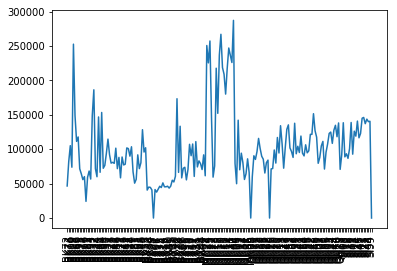

In [108]:
# AreaID vs economy
tmpdf1=ny_df1[ny_df1['RowType']=="Estimate"][['AreaID','medianfamilyincome']]
print(tmpdf1.size)
#tmpdf1
#tmpdf1.iloc[rc,0]

#AreaID_by_neighborhood

plt.xticks(rotation=90)
plt.plot(tmpdf1['AreaID'],tmpdf1['medianfamilyincome'])

380


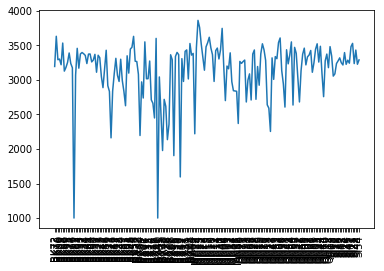

In [109]:
# AreaID vs housing cost
#ny_df2.head()
#ny_df2[ny_df2['RowType']=='Estimate'][['AreaID','HousingCost_average']]
#ny_df2[ny_df2['RowType']=='Estimate'][['AreaID','HousingCost_average']]
tmpdf2=ny_df2[ny_df2['RowType']=="Estimate"][['AreaID','HousingCost_average']]
#
#print(tmpdf2.size)

#tmpdf2.drop(
tmpdf2=tmpdf2[tmpdf2['HousingCost_average']!="#DIV/0!"]
#,axis=0)

#tmpdf2[tmpdf2['HousingCost_average']=="#DIV/0!"]="NaN"
#tmpdf2[tmpdf2['HousingCost_average']=="#DIV/0!"]
#tmpdf2['HousingCost_average'].dropna(axis=0, inplace=True)

tmpdf2['HousingCost_average']=pd.to_numeric(tmpdf2['HousingCost_average'])

#tmpdf2['HousingCost_average']

print(tmpdf2.size)
#tmpdf2

plt.xticks(rotation=90)
plt.plot(tmpdf2['AreaID'],tmpdf2['HousingCost_average'])

In [110]:
#tmpdf2['AreaID'][0]
#tmpdf1['AreaID'][0]
tmpdf1['medianfamilyincome'].iloc[0]

46599.88257742551

In [111]:
# combine economy and housing

xydata=[]
for ic in range(len(tmpdf1)):
    ID=tmpdf1['AreaID'].iloc[ic]
    Income=tmpdf1['medianfamilyincome'].iloc[ic]
    xyval=[ID,int(Income),0]
    xydata.append(xyval)

print('LEN xydata',len(xydata))
#xydata
#xydata[0]
xydata[0][1]

LEN xydata 195


46599

In [112]:
# combine economy and housing - continued

for ic in range(len(tmpdf2)):
    found=False
    ID=tmpdf2['AreaID'].iloc[ic]
    Cost=tmpdf2['HousingCost_average'].iloc[ic]
    for jc in range(len(xydata)):
        if (xydata[jc][0]==ID):
            xydata[jc][2]=int(Cost)
            found=True
            break
    if (found==False):
        xyval=[ID,0,int(Cost)]
        xydata.append(xyval)
    #

print('LEN xydata',len(xydata))
xydata[0]

LEN xydata 195


['BK72', 46599, 3195]

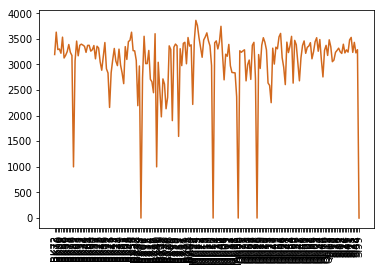

In [113]:
# combine economy and housing - continued

x=[]
y1=[]
y2=[]
y3=[]
for ic in range(len(xydata)):
    x.append(xydata[ic][0])
    y1.append(xydata[ic][1]) # medianfamilyincome
    y2.append(xydata[ic][2]) # HousingCost_average
    if (xydata[ic][2]!=0):
        y3.append(int(xydata[ic][1]/xydata[ic][2])) # medianfamilyincome / HousingCost_average
    else:
        y3.append(0)
    #


plt.xticks(rotation=90)

#plt.plot(x,y1, '-.', color="#333333")
plt.plot(x,y2, '-', color="chocolate")

#plt.plot(Z, '-.', color="green")

plt.show()

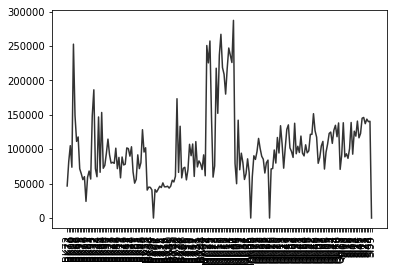

In [114]:
# combine economy and housing - continued

plt.xticks(rotation=90)

#plt.plot(x,y1, '-.', color="#333333")
plt.plot(x,y1, '-', color="#333333")

#plt.plot(x,y2, '-', color="chocolate")

#plt.plot(Z, '-.', color="green")

plt.show()

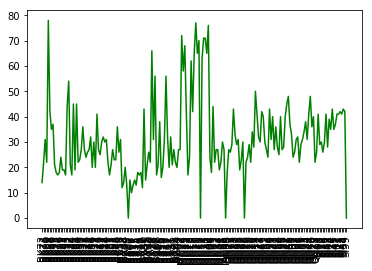

In [115]:
# combine economy and housing - continued

plt.xticks(rotation=90)

#plt.plot(x,y1, '-.', color="#333333")
#plt.plot(x,y2, '-', color="chocolate")

plt.plot(x,y3, '-', color="green")

plt.show()

In [116]:
# show numbers
print('ID','Aincome','Hcost','Aincome/Hcost')
for ic in range(len(xydata)):
    #print(xydata[ic][0],xydata[ic][1],xydata[ic][2])
    print(x[ic],y1[ic],y2[ic],y3[ic])

ID Aincome Hcost Aincome/Hcost
BK72 46599 3195 14
BK73 82017 3632 22
BK76 105184 3292 31
BK90 73865 3302 22
BK09 252697 3220 78
BK38 148999 3534 42
BK68 111413 3127 35
BK69 117829 3180 37
BK35 71563 3253 21
BK75 64317 3390 18
BK77 55833 3237 17
BK78 60182 3176 18
BK99 24236 1000 24
BK82 59191 3070 19
BK83 68334 3457 19
BK93 56667 3170 17
BK33 148788 3376 44
BK37 186371 3397 54
BK32 71740 3379 21
BK34 60007 3355 17
BK40 146921 3237 45
BK61 66506 3373 19
BK64 153432 3375 45
BK60 72353 3261 22
BK63 76527 3288 23
BK30 94299 3370 27
BK31 114697 3111 36
BK27 92156 3357 27
BK28 79814 3322 24
BK29 81015 3050 26
BK41 79493 2888 27
BK46 101535 3156 32
BK88 71768 3429 20
BK19 88130 2916 30
BK21 58419 2833 20
BK23 88721 2161 41
BK26 77190 2838 27
BK42 78182 3093 25
BK43 101894 3313 30
BK17 100902 3067 32
BK25 89976 2978 30
BK44 103582 3300 31
BK79 67080 2990 22
BK81 50691 2832 17
BK85 56270 2626 21
BK91 91824 3349 27
BK95 71817 3099 23
BK96 80476 3447 23
BK45 128386 3473 36
BK50 95918 3631 26
BK58

In [117]:
# move to numpy
npy3=np.array(y3)
average=np.mean(npy3) 
standarddeviation=np.std(npy3)
#print('Mean', np.mean(npy3), 'Stdev', np.std(npy3))
print('Mean', average, 'Stdev', standarddeviation)

Mean 31.205128205128204 Stdev 14.90307056156719


In [118]:
# get all ID above Mean+Stdev
jc=0
for ic in range(len(xydata)):
    #print(xydata[ic][0],xydata[ic][1],xydata[ic][2])
    if (y3[ic]>=average+2*standarddeviation):
        jc+=1
        print(jc,x[ic],y1[ic],y2[ic],y3[ic])

1 BK09 252697 3220 78
2 BX22 173419 2617 66
3 MN23 250741 3464 72
4 MN25 257314 3759 68
5 MN13 217751 3479 62
6 MN17 236856 3618 65
7 MN19 267036 3464 77
8 MN20 218671 3364 65
9 MN21 208977 2978 70
10 MN12 217187 3424 63
11 MN14 247107 3461 71
12 MN31 236565 3304 71
13 MN32 226046 3437 65
14 MN40 287284 3746 76


0 Battery Park City 27 1
1 Carnegie Hill 29 1
2 Chelsea 17 1
3 Civic Center 31 2
4 East Village 19 2
5 Financial District 28 2
6 Flatiron 37 3
7 Gramercy 26 1
8 Greenwich Village 18 1
9 Hudson Yards 38 3
10 Little Italy 22 5
11 Manhattanville 5 1
12 Midtown 15 2
13 Midtown South 32 4
14 Murray Hill 16 2
15 Noho 30 3
16 Sutton Place 33 1
17 Tribeca 21 1
18 Turtle Bay 34 2
19 Washington Heights 2 2
20 West Village 24 3


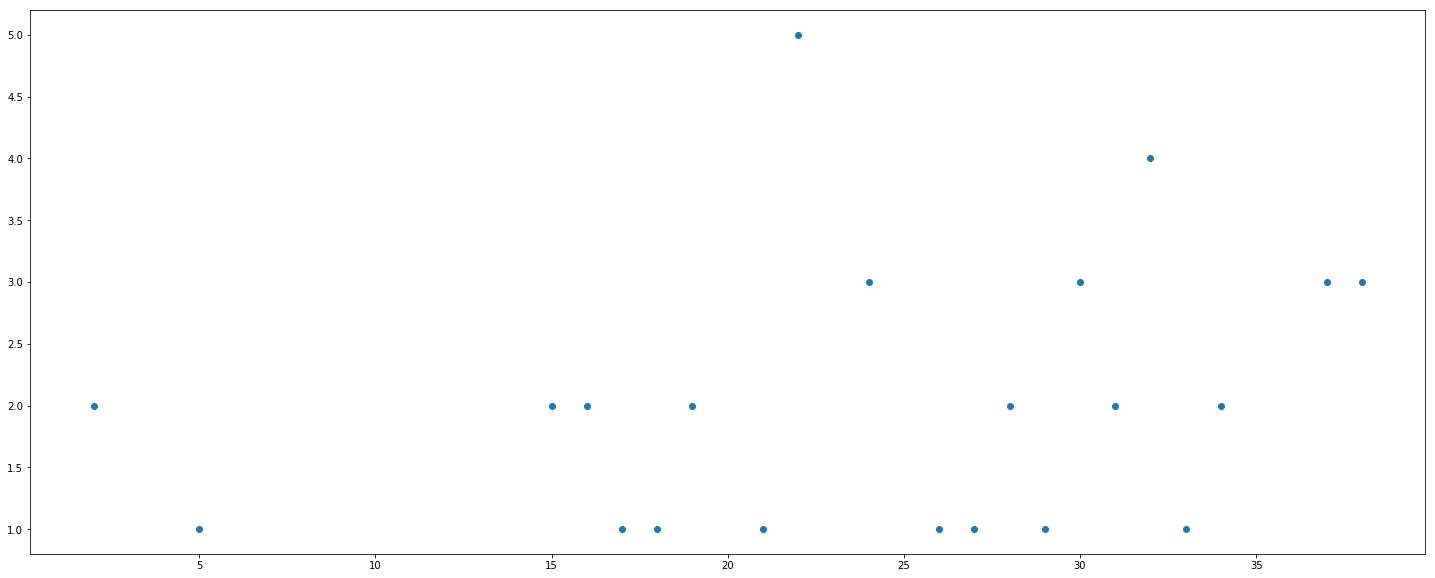

In [119]:
plt.rcParams['figure.figsize']=[25, 10]

# AreaID vs Coffee places
df2=coffee_grouped['Venue Category']
xvalues2=GetAreaNumbers(df2)
plt.plot(xvalues2, df2, "o")

0 Carnegie Hill 29 1
1 Clinton 14 1
2 East Harlem 7 2
3 East Village 19 3
4 Financial District 28 2
5 Flatiron 37 1
6 Inwood 3 2
7 Little Italy 22 1
8 Midtown 15 1
9 Noho 30 2
10 Sutton Place 33 1
11 Tribeca 21 1
12 Upper East Side 8 1
13 Washington Heights 2 2
14 Yorkville 9 1


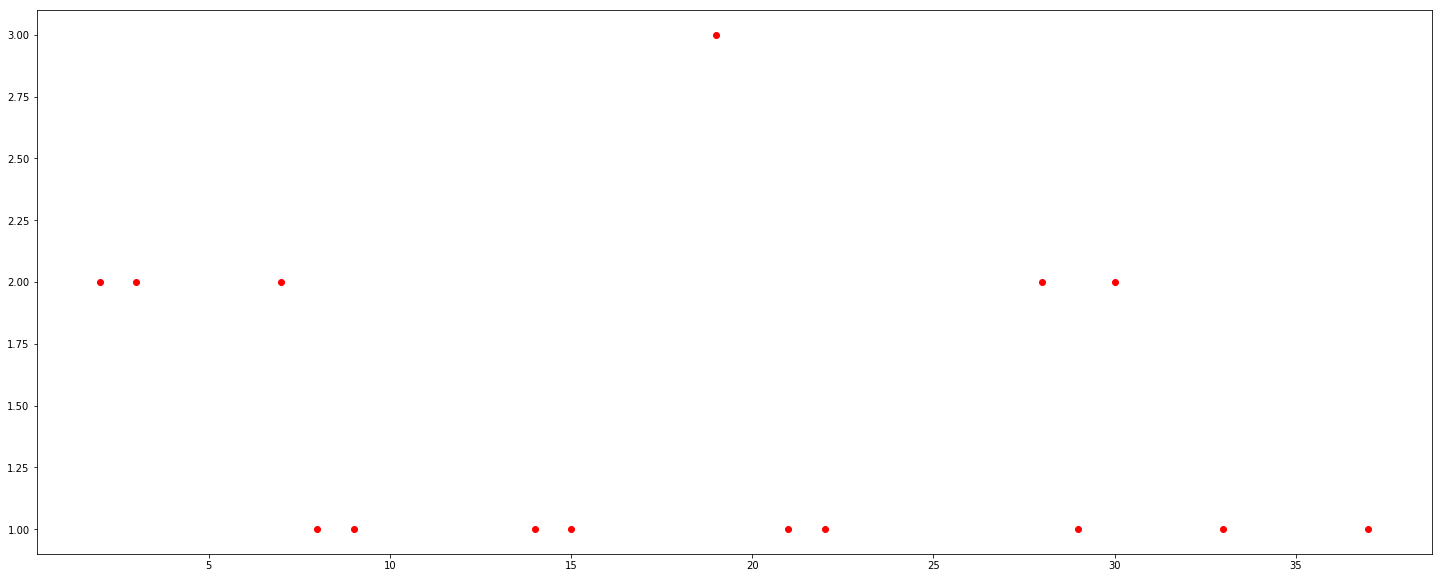

In [120]:
# AreaID vs Pizza places
df1=pizza_grouped['Venue Category']
xvalues1=GetAreaNumbers(df1)
plt.plot(xvalues1,df1,"ro")

In [121]:
max(xvalues1)

37

In [122]:
#AreaID_by_neighborhood[0][1]

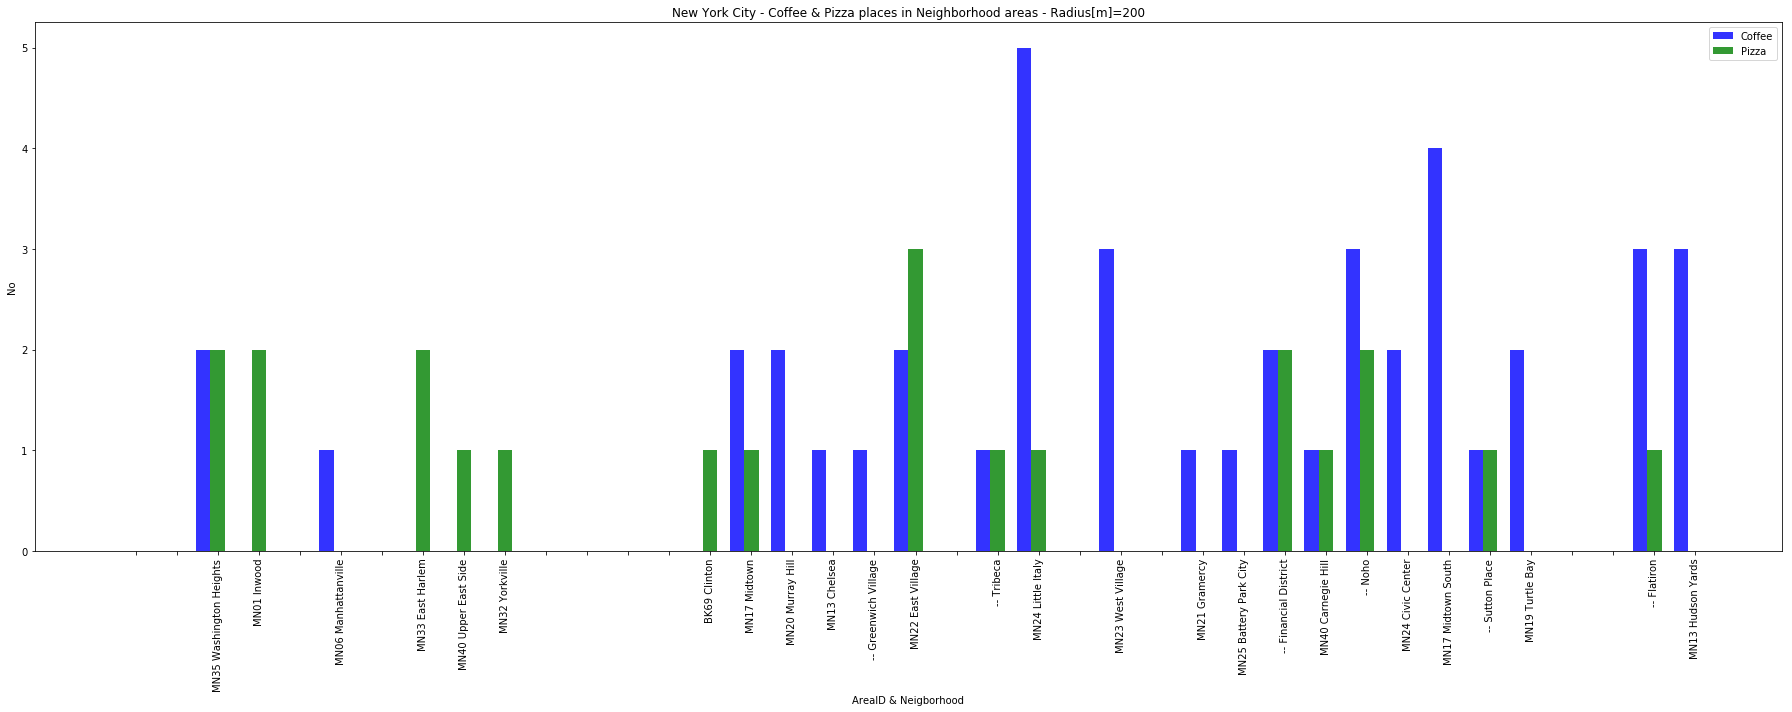

In [123]:
# AreaID - combined data

# BAR chart

# data to plot
#n_groups = np.maximum( len(xvalues1), len(xvalues2))
n_groups = 1 + np.maximum( max(xvalues1), max(xvalues2))


AreaIndex = []
for jc in range(n_groups):
    AreaIndex.append("")


yv1= np.zeros(n_groups)
yv2= np.zeros(n_groups)

# fill yv with data
for jc in range(len(df1)):
    yv1[xvalues1[jc]]=df1[jc]
    ID=getAreaNameID(df1.index[jc])
    AreaIndex[xvalues1[jc]]=ID+' '+df1.index[jc]


for jc in range(len(df2)):
    yv2[xvalues2[jc]]=df2[jc]
    ID=getAreaNameID(df2.index[jc])
    AreaIndex[xvalues2[jc]]=ID+' '+df2.index[jc]




#means_frank = (90, 55, 40, 65)
#means_guido = (85, 62, 54, 20)
#means_coffee = df2
#means_guido = df1
means_coffee = yv2
means_guido = yv1


# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_coffee, bar_width,
alpha=opacity,
color='b',
label='Coffee')

rects2 = plt.bar(index + bar_width, means_guido, bar_width,
alpha=opacity,
color='g',
label='Pizza')

#plt.xlabel('Person')
#plt.ylabel('Scores')
#plt.title('Scores by person')
#plt.xticks(index + bar_width, ('A', 'B', 'C', 'D'))

plt.xlabel('AreaID & Neigborhood')
plt.ylabel('No')
plt.title('New York City - Coffee & Pizza places in Neighborhood areas - Radius[m]='+str(radiuslimit))
#plt.xticks(index + bar_width, index)
plt.xticks(index + bar_width, AreaIndex, rotation='vertical')

plt.legend()

plt.tight_layout()
plt.show()

# Let's put that into a pandas dataframe

In [124]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [125]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = manhattan_grouped['Neighborhood']

for ind in np.arange(manhattan_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(manhattan_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Battery Park City,Park,Food Court,Department Store,Sandwich Place,Cupcake Shop,Gym,Gastropub,Burrito Place,Boutique,Boat or Ferry
1,Carnegie Hill,Italian Restaurant,Café,Spa,Bar,Pharmacy,Ramen Restaurant,Concert Hall,Community Center,Coffee Shop,Shipping Store
2,Central Harlem,Café,Bar,Gym / Fitness Center,American Restaurant,Deli / Bodega,Vegetarian / Vegan Restaurant,Music Venue,Cycle Studio,Southern / Soul Food Restaurant,Fried Chicken Joint
3,Chelsea,Café,Vietnamese Restaurant,Speakeasy,Ice Cream Shop,Bakery,Mexican Restaurant,Men's Store,Mediterranean Restaurant,French Restaurant,Nightclub
4,Chinatown,Bubble Tea Shop,Chinese Restaurant,Dumpling Restaurant,Museum,General Entertainment,Noodle House,Bike Shop,Sake Bar,English Restaurant,Restaurant


In [126]:
neighborhoods_venues_sorted.size

429

## 4. Cluster Neighborhoods

In [127]:
# set number of clusters
kclusters = 9

manhattan_grouped_clustering = manhattan_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(manhattan_grouped_clustering)

# check cluster labels generated for each row in the dataframe
#kmeans.labels_[0:10]
kmeans.labels_

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 2, 6, 2,
       1, 1, 5, 1, 1, 3, 1, 4, 1, 1, 8, 1, 1, 1, 1, 1, 1], dtype=int32)

In [128]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

manhattan_merged = manhattan_data
#manhattan_merged.dropna(axis=0, inplace=True)

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
manhattan_merged = manhattan_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

manhattan_merged.head() # check the last columns!

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Manhattan,Marble Hill,40.876551,-73.910660,2.0,Deli / Bodega,Supermarket,Pharmacy,Field,Gas Station,Garden Center,Garden,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint
1,Manhattan,Chinatown,40.715618,-73.994279,1.0,Bubble Tea Shop,Chinese Restaurant,Dumpling Restaurant,Museum,General Entertainment,Noodle House,Bike Shop,Sake Bar,English Restaurant,Restaurant
2,Manhattan,Washington Heights,40.851903,-73.936900,1.0,Bakery,Café,Coffee Shop,Grocery Store,Deli / Bodega,Pizza Place,Park,Mexican Restaurant,Market,Liquor Store
3,Manhattan,Inwood,40.867684,-73.921210,1.0,Pizza Place,Wine Bar,Bank,Café,American Restaurant,Diner,Restaurant,Farmers Market,Mexican Restaurant,Chinese Restaurant
4,Manhattan,Hamilton Heights,40.823604,-73.949688,7.0,Café,Bar,Mexican Restaurant,Bakery,Cocktail Bar,Falafel Restaurant,Yoga Studio,French Restaurant,Food Court,Food Truck


In [129]:
manhattan_merged.dropna(axis=0, inplace=True)
#manhattan_merged

## visualize the resulting clusters

In [130]:
# get geo location for Manhattan
address = 'New York, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of {} are {}, {}.'.format(address, latitude, longitude))

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, num=len(ys)))
#colors_array = cm.rainbow(np.linspace(0, 1, num=kclusters))
rainbow = [colors.rgb2hex(i) for i in colors_array]
print('kclusters',kclusters)
print('colors_array',colors_array)
print('rainbow',rainbow)
#print('Cluster Labels',manhattan_merged['Cluster Labels'])

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels']):
    #if (cluster>0.0):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
            [lat, lon],
            radius=5,
            popup=label,
            color=rainbow[int(cluster)-1],
            fill=True,
            fill_color=rainbow[int(cluster)-1],
            fill_opacity=0.7).add_to(map_clusters)

map_clusters

The geograpical coordinate of New York, NY are 40.7127281, -74.0060152.
kclusters 9
colors_array [[5.00000000e-01 0.00000000e+00 1.00000000e+00 1.00000000e+00]
 [2.49019608e-01 3.84105749e-01 9.80634770e-01 1.00000000e+00]
 [1.96078431e-03 7.09281308e-01 9.23289106e-01 1.00000000e+00]
 [2.52941176e-01 9.25637660e-01 8.30184031e-01 1.00000000e+00]
 [5.03921569e-01 9.99981027e-01 7.04925547e-01 1.00000000e+00]
 [7.54901961e-01 9.20905518e-01 5.52364973e-01 1.00000000e+00]
 [1.00000000e+00 7.00543038e-01 3.78411050e-01 1.00000000e+00]
 [1.00000000e+00 3.72701992e-01 1.89801093e-01 1.00000000e+00]
 [1.00000000e+00 1.22464680e-16 6.12323400e-17 1.00000000e+00]]
rainbow ['#8000ff', '#4062fa', '#00b5eb', '#40ecd4', '#80ffb4', '#c0eb8d', '#ffb360', '#ff5f30', '#ff0000']
